<a href="https://www.kaggle.com/code/prasadposture121/house-price-predictions?scriptVersionId=120716781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Price Prediction with Linear Regression

![](https://i.imgur.com/3sw1fY9.jpg)

In [1]:
#filtering the warnings to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# 1. Loading and Exploring Data

In [2]:
import pandas as pd

#showing max rows
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [3]:
prices_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
prices_df.shape

(1460, 81)

Let's explore the columns and data types within the dataset.

In [5]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Visualizing the dataset

In [6]:
#importing the dependencies for visualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#setting the style and background
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### `Sales Prices`

In [7]:
px.histogram(prices_df, x='SalePrice', title='Distribution of Sales Price')

Majority of the data points lie in the range of 100k-300k and as we move further the number of expensive properties sold decreases.

#### Year Built and Year Sold

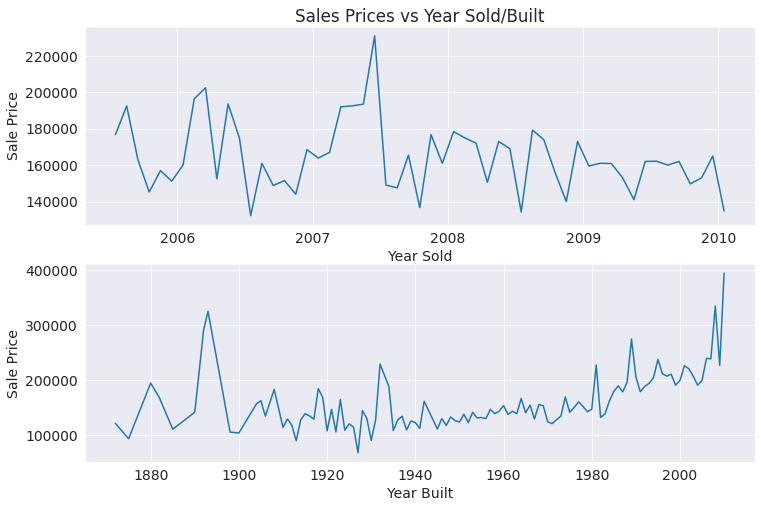

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].set_title('Sales Prices vs Year Sold/Built')

xdmd=prices_df.groupby(['YrSold', 'MoSold'], as_index=False)['SalePrice'].median()
axes[0].plot(xdmd.index, xdmd.SalePrice)
axes[0].set_xlabel('Year Sold')
axes[0].set_ylabel('Sale Price')
axes[0].set_xticks([5.5, 17.5, 29.5, 41.5, 53.5])
axes[0].set_xticklabels([2006, 2007, 2008, 2009, 2010])


xdmdb=prices_df.groupby('YearBuilt')['SalePrice'].median()
axes[1].plot(xdmdb.index,xdmdb)
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Sale Price');

1. The sales prices are seem to be increasing from the end of the 2006 to till end of the 2007 with the a spike in Dec, 2022. Then they show sudden decrease in Jan 2008 and do not show much variation in the prices afterwards. The reasons behind this sudden fall were low interest rates, easy credit, insufficient regulation, and toxic subprime mortgages. You can read more about it [over here](https://financialcomplete.com/why-did-house-prices-fall-in-2008).
2. After 1925, the sale price appears to be propotional to the year when the house was built i.e. old houses are sold for the lesser price than the new houses. The reason behind this could be the condition of houses getting bad over the period of time.

#### Overall Quality of the Houses

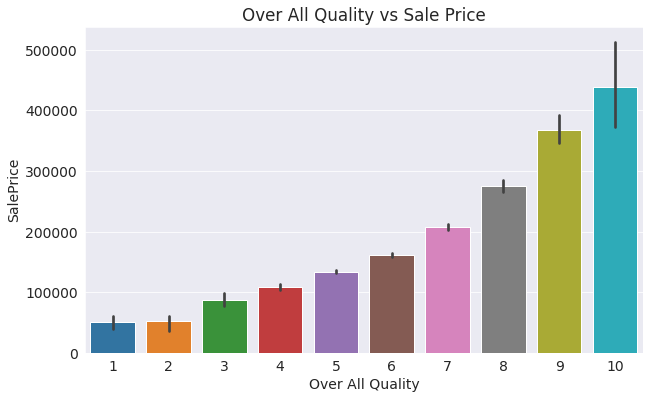

In [9]:
sns.barplot(x=prices_df['OverallQual'],y=prices_df['SalePrice'])
plt.title('Over All Quality vs Sale Price')
plt.xlabel('Over All Quality');

Sale price is increasing with over all quality which is no surprise.

#### Quality, Condition and Year Built

In [10]:
px.scatter_3d(prices_df, x='OverallQual', y='OverallCond', z='YearBuilt',
              title='Relation between Quality, Condition and Year Built')

1. The relationship between over all quality and over all condition isn't linear (as someone might expect). It appears that houses can be in good condition even though their over all quality is poor.
2. The over all quality of house built between 1900 to 1960, falls below average whereas it's above average for houses built after 1960. And it's average for houses built before 1900.
3. The houses having over all condition below average were mostly built between 1900-1980.

#### Overall Condition of the Houses

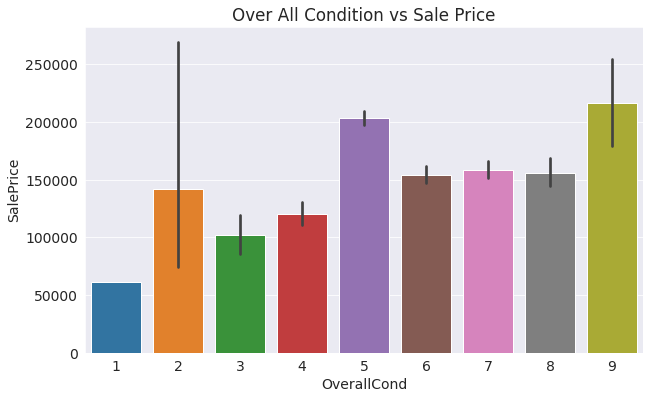

In [11]:
sns.barplot(x=prices_df['OverallCond'],y=prices_df['SalePrice'])
plt.title('Over All Condition vs Sale Price');

It doesn't show linear increment in sale price with the over all condtion as we have already seen that good condition doesn't imply good quality (and this is the reason sales price isn't significantly increasing with overall condition rating getting increased from 6 to 7 till 8).  Also for over all condition of level 2 i.e. poor, the sale prices show large variation. 

#### Streets and Allies

In [12]:
xdf=prices_df.groupby(['Street','Alley','MSZoning','Neighborhood'], as_index=False, dropna=False)['Id'].count()
xdf.fillna('NA', inplace=True)
xdf.rename(columns={'Id':'Number of Houses'}, inplace=True)
px.sunburst(xdf,path=['Street','Alley','MSZoning','Neighborhood'], values='Number of Houses', color='Number of Houses')

The above sunburst classifies the number of houses based on the `Street, Alley, MSZoning` and `Neighbourhood`. We can draw mainly two conclusions from this.
1. Almost all the streets are `Paved`(only six are `Gravel`) 
2. Majority of the houses don't have alley access (indicated by `NA`)

#### Neighbourhood

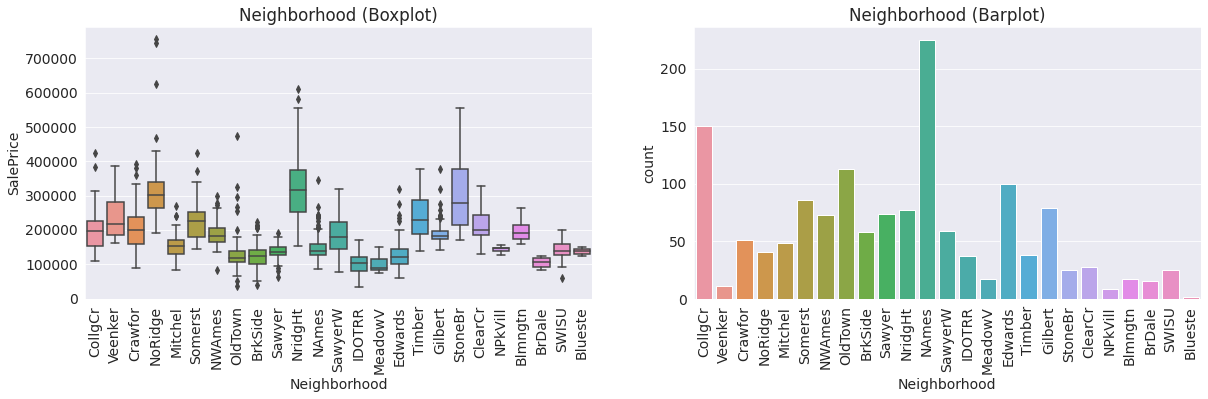

In [13]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('Neighborhood (Boxplot)')
axes[0].set_xticklabels(labels=prices_df['Neighborhood'].unique().tolist(),rotation=90)
sns.boxplot(y=prices_df['SalePrice'], x=prices_df['Neighborhood'], ax=axes[0])
axes[1].set_title('Neighborhood (Barplot)')
sns.countplot(x=prices_df['Neighborhood'], ax=axes[1])
plt.xticks(rotation=90);

The houses from neighbourhoods `NridgHt (Northridge Heights)` and `StoneBr (Stone Brook)` show large variation in the `SalePrice`. The `SalePrice` is in the `NoRidge (Northridge)` neighbourhood. However the maximum numbers of houses are sold in `NAmes (North Ames)` neighbourhood followed by `CollgCr (College Creek)` and the least number of houses are sold in `Blueste (Bluestem)` followed by `NPkVill (Northpark Villa)`.

##### We can similiary use loop through all the other categorical variables and discrete variables to obtain their relationship with `SalePrice` using boxplot.

In [14]:
discrete = ['MSSubClass','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'MoSold','YrSold']
categorical=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition1', 'Condition2','HouseStyle', 'RoofStyle',
 'RoofMatl', 'Exterior1st', 'Exterior2nd','BldgType','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

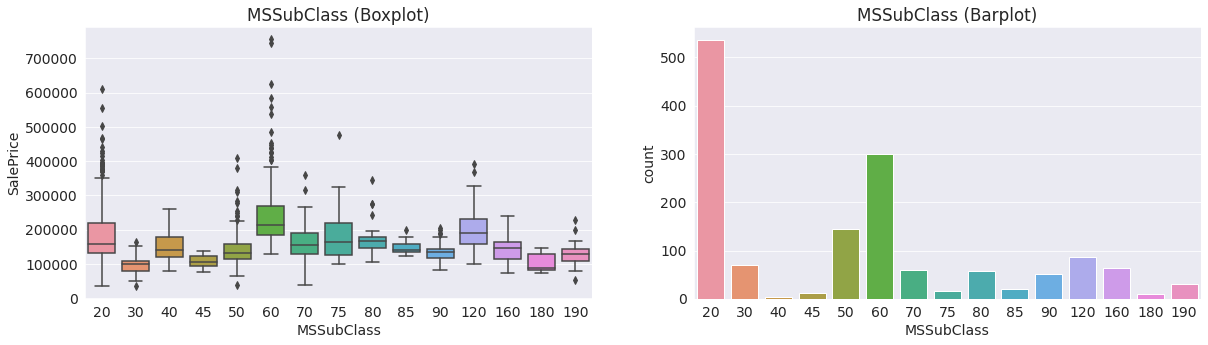

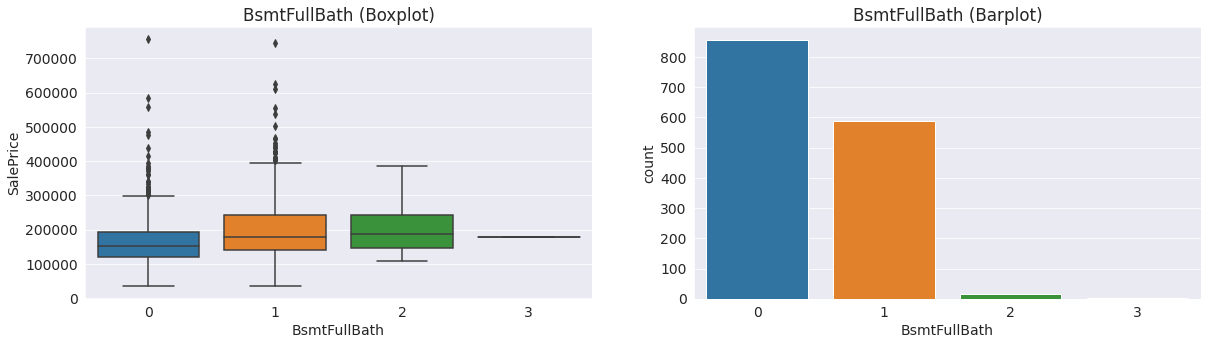

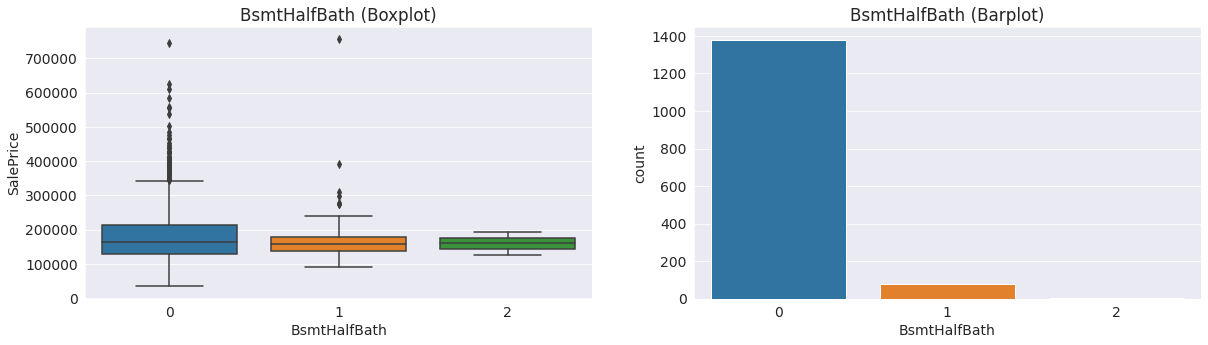

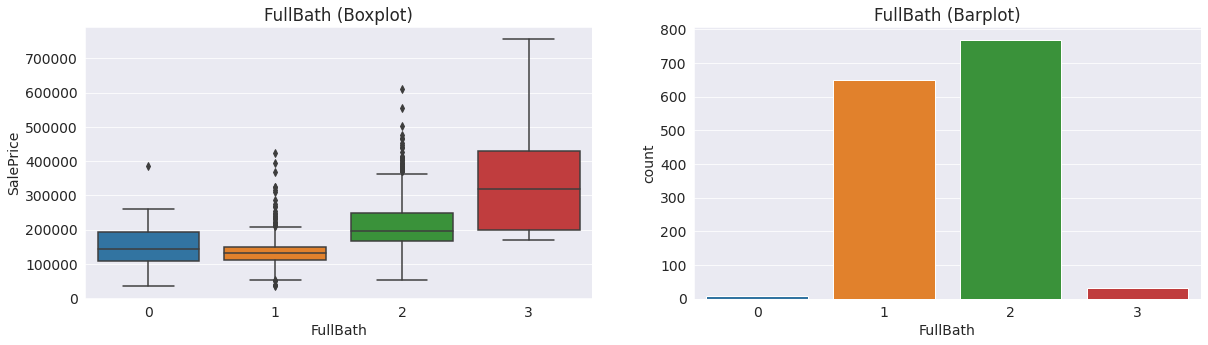

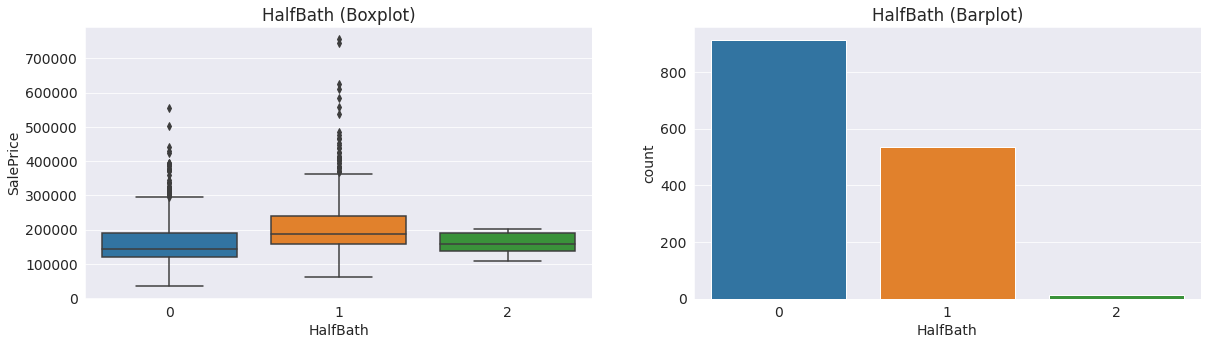

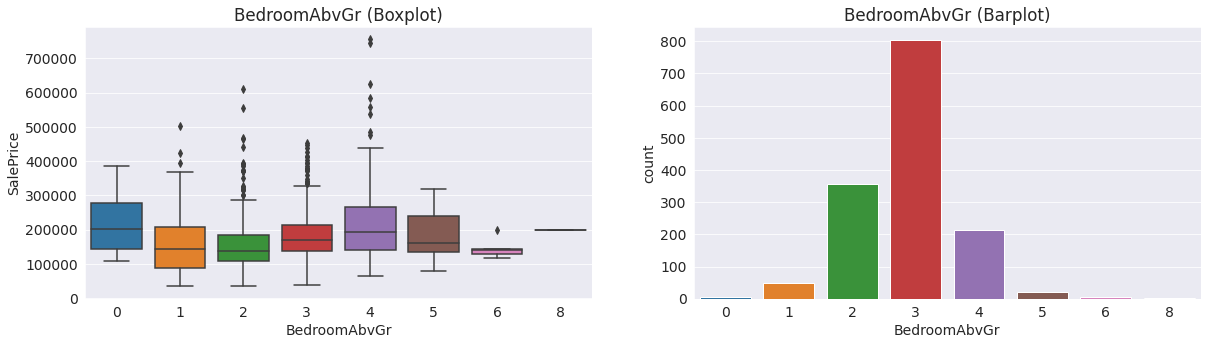

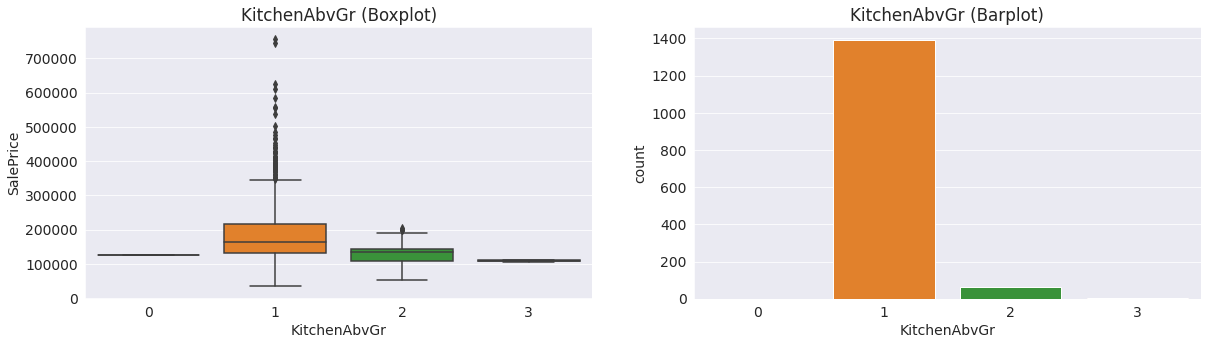

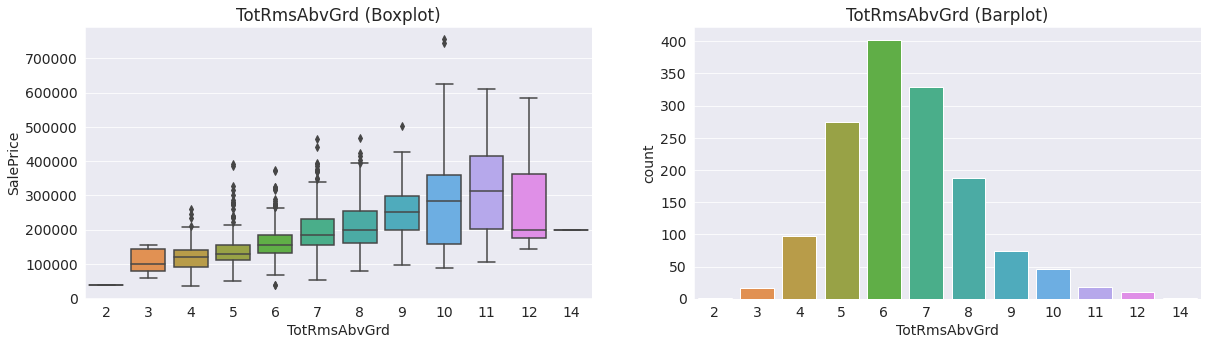

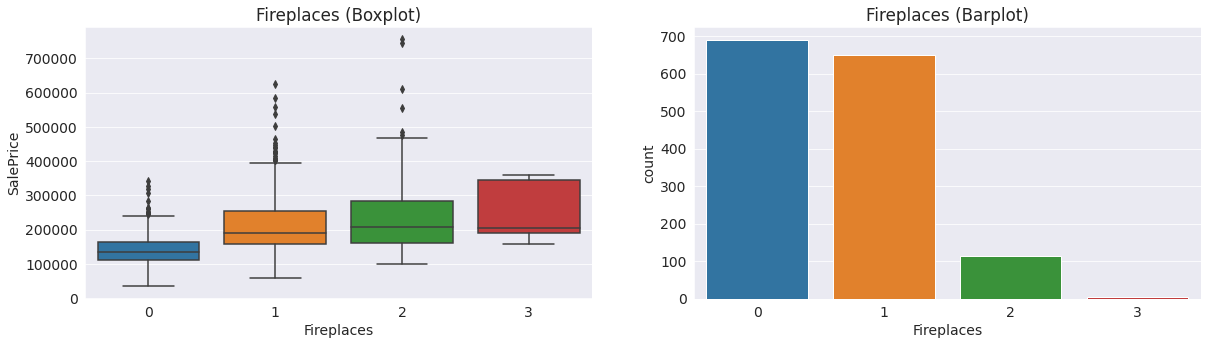

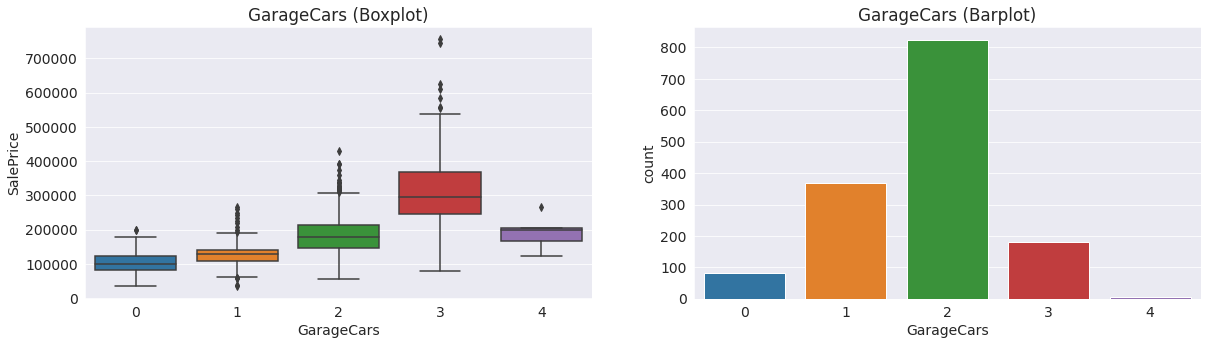

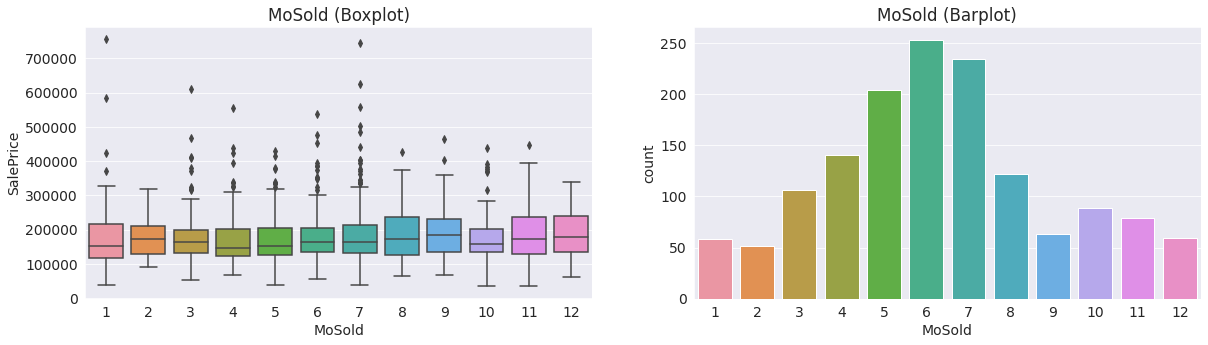

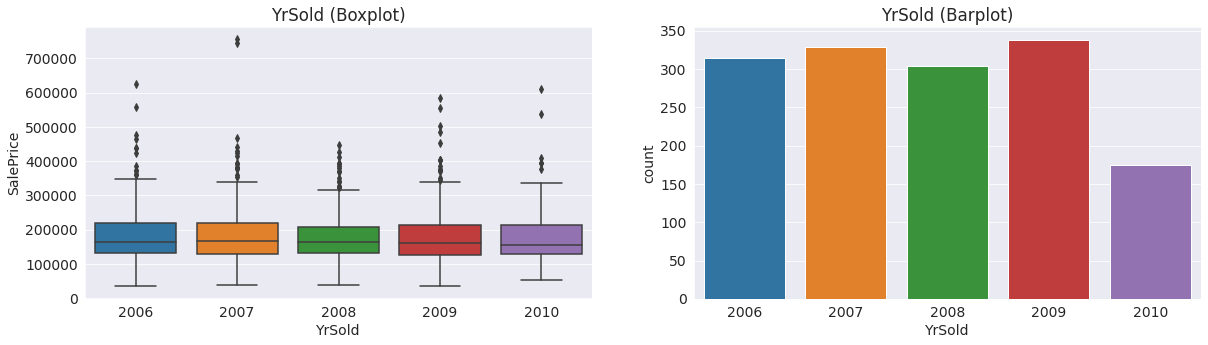

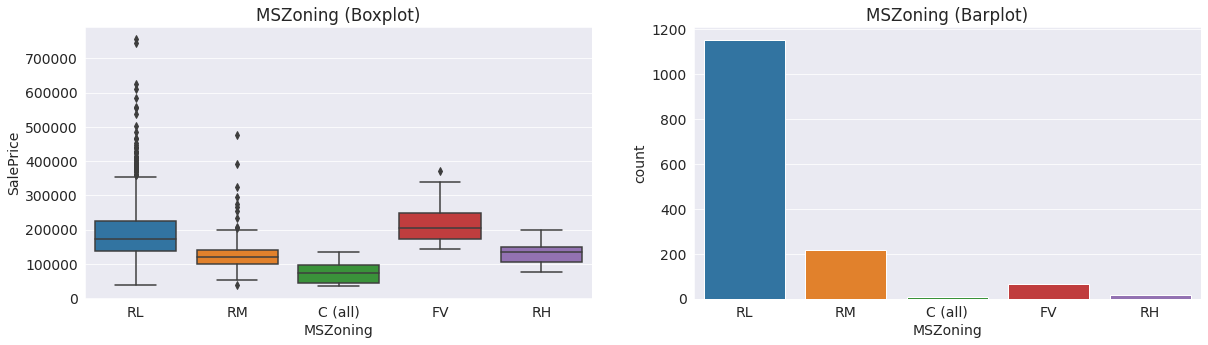

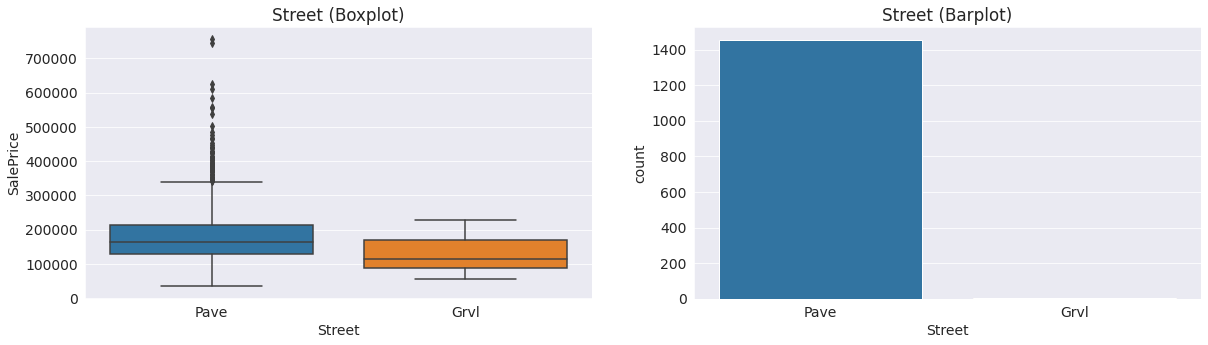

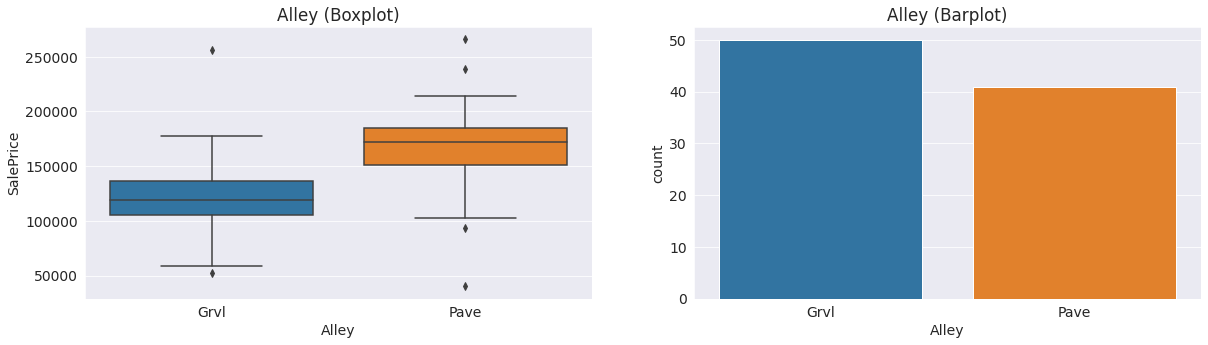

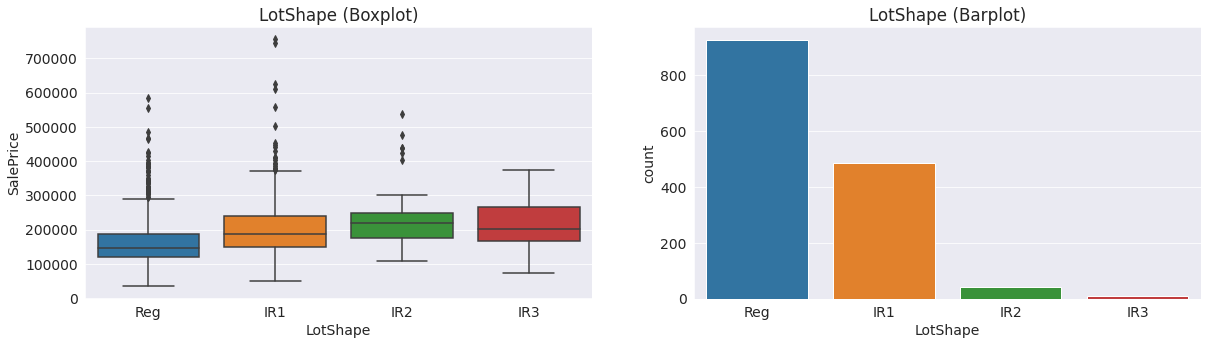

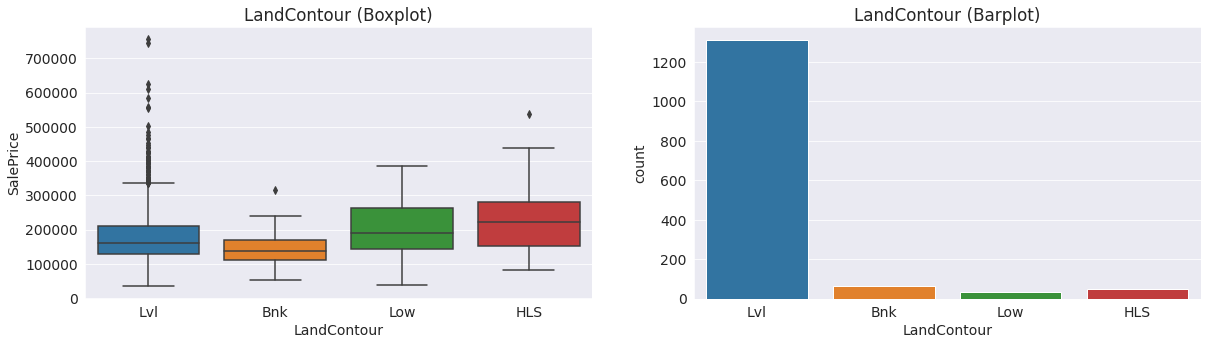

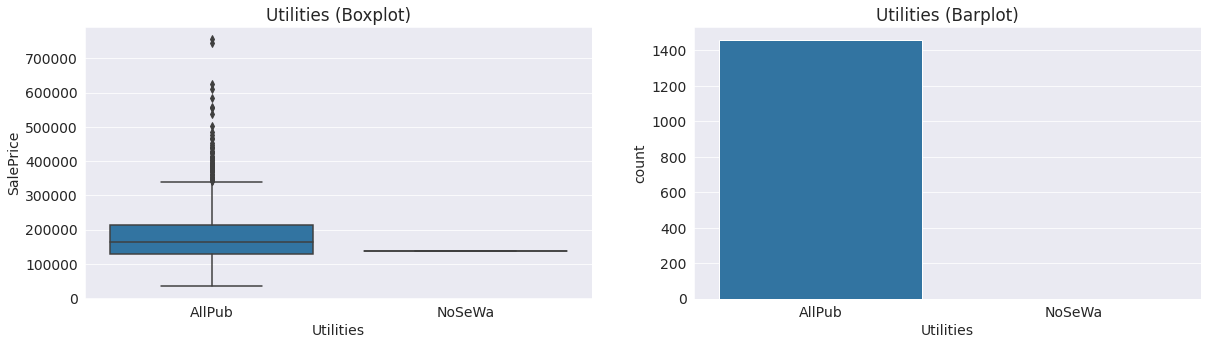

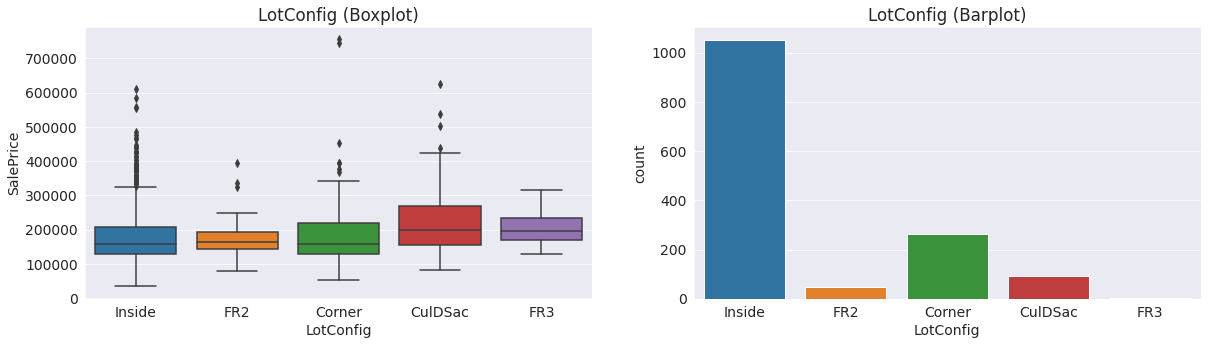

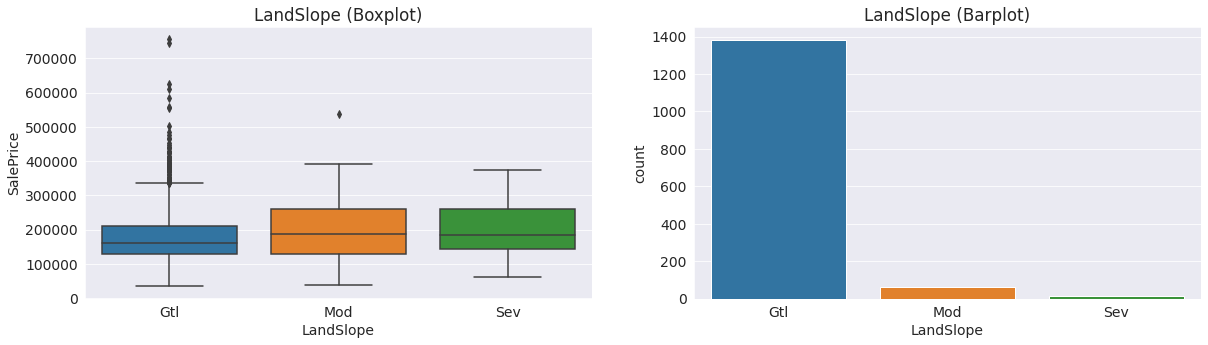

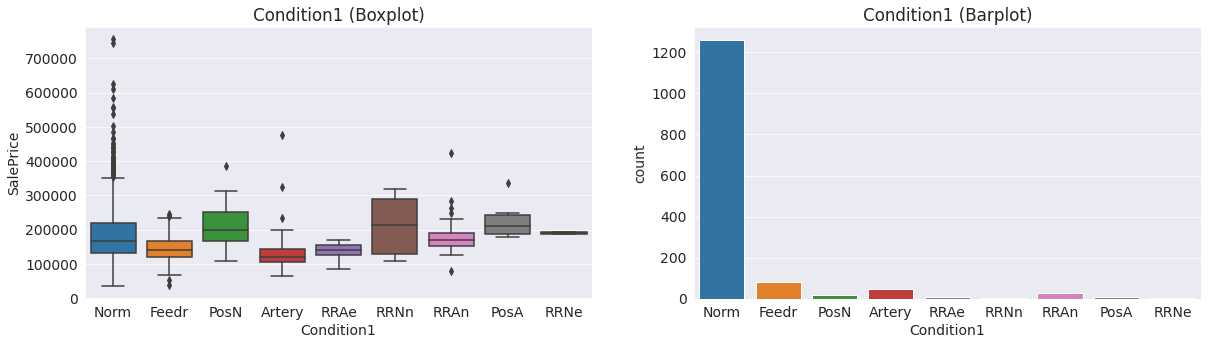

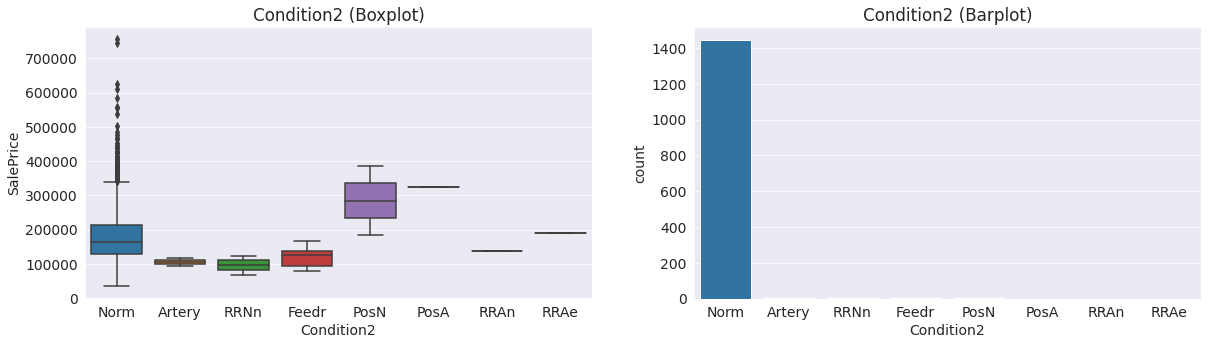

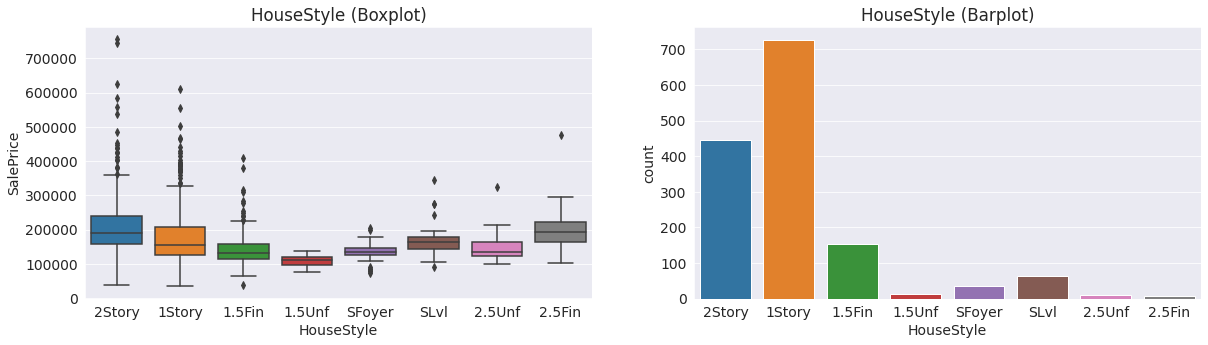

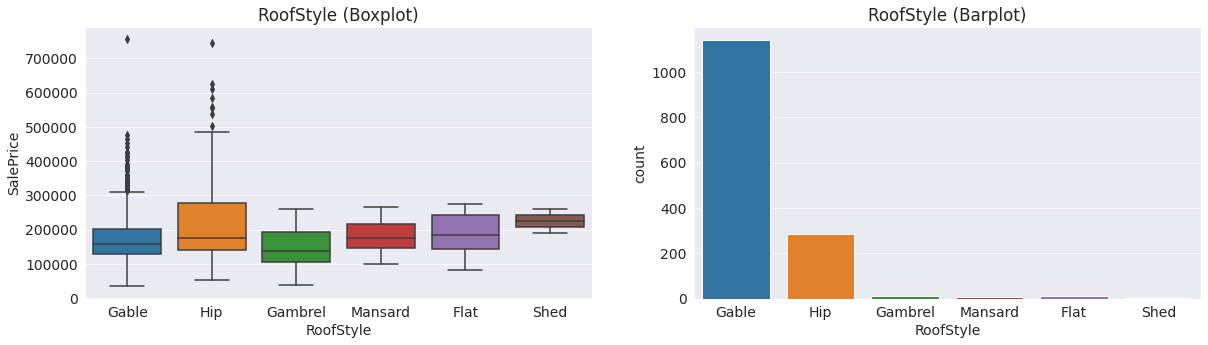

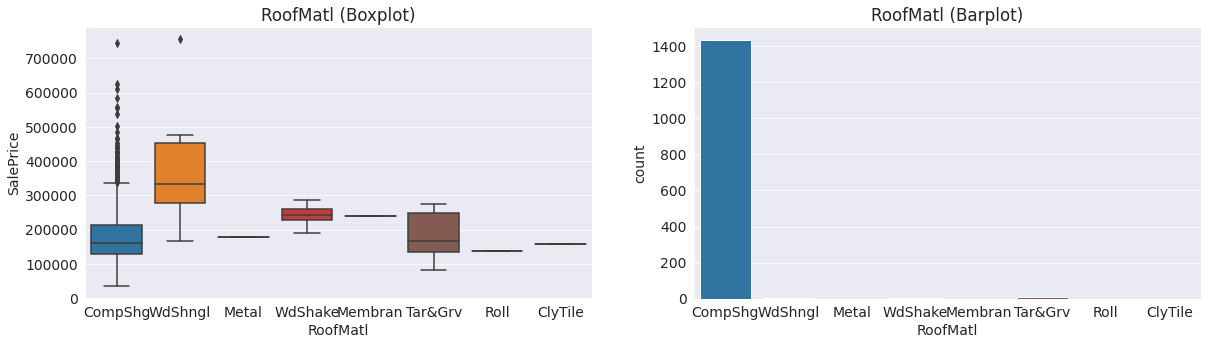

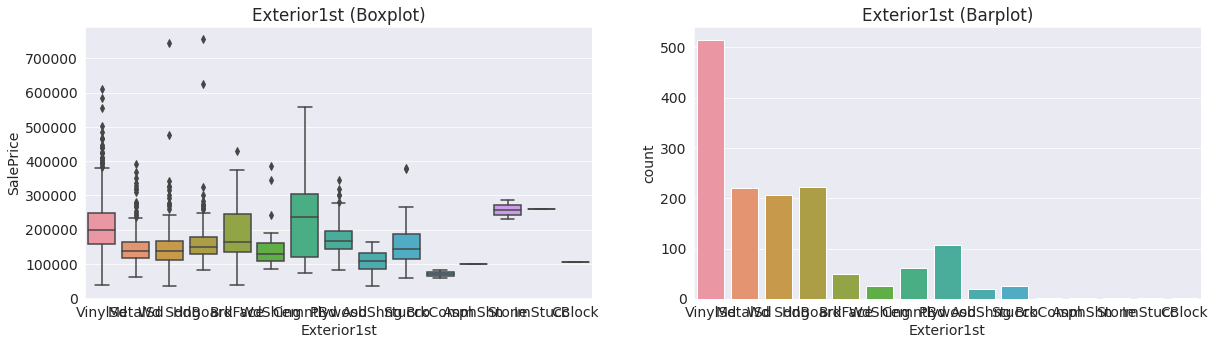

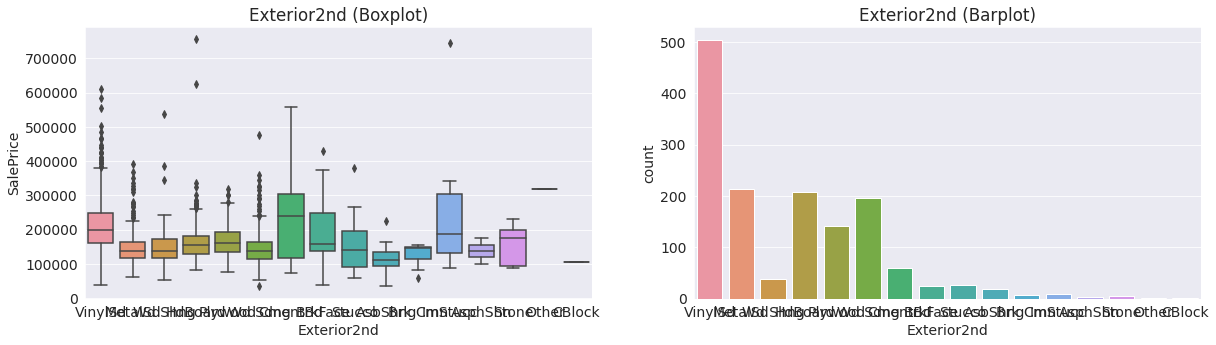

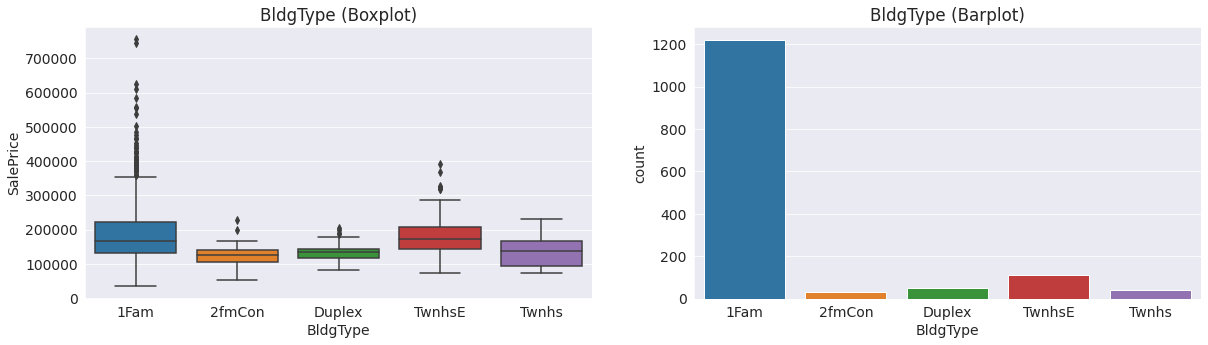

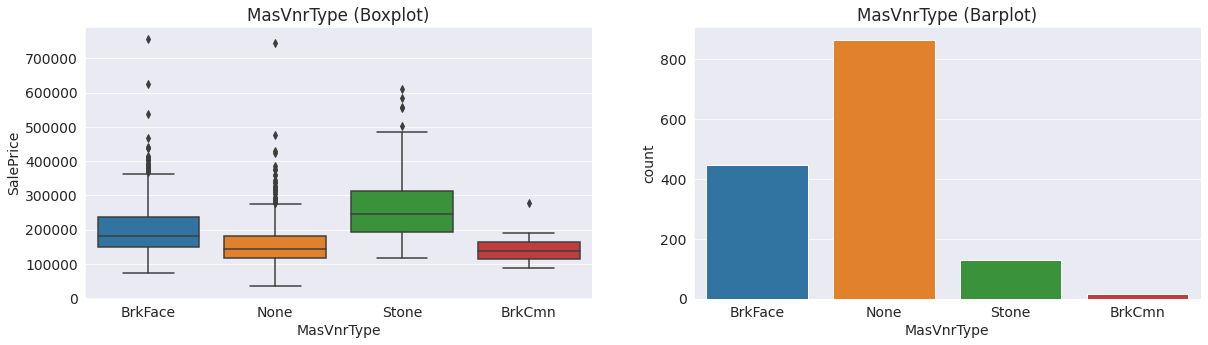

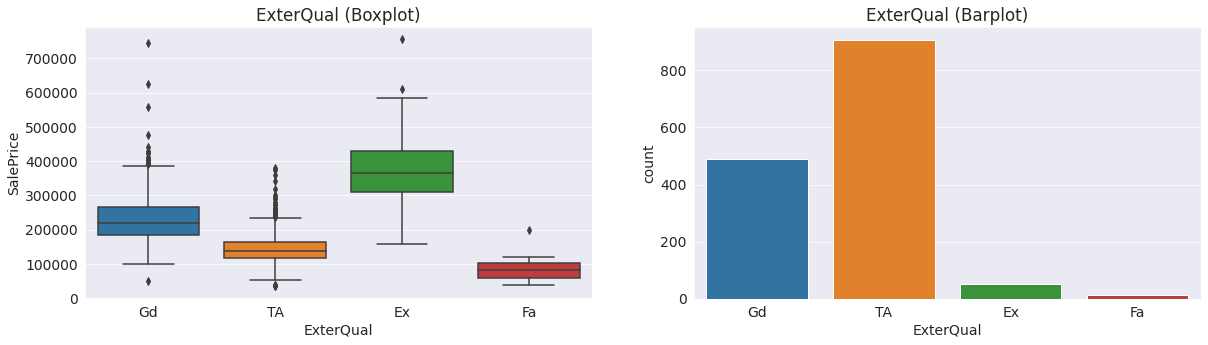

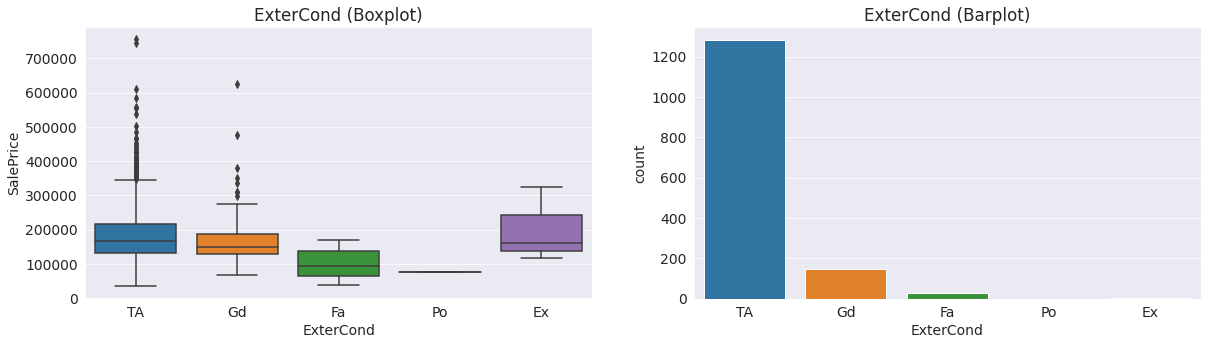

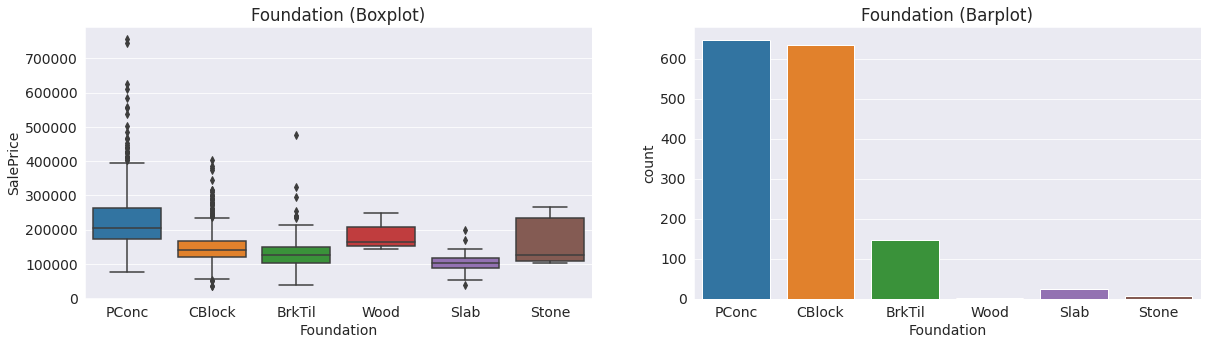

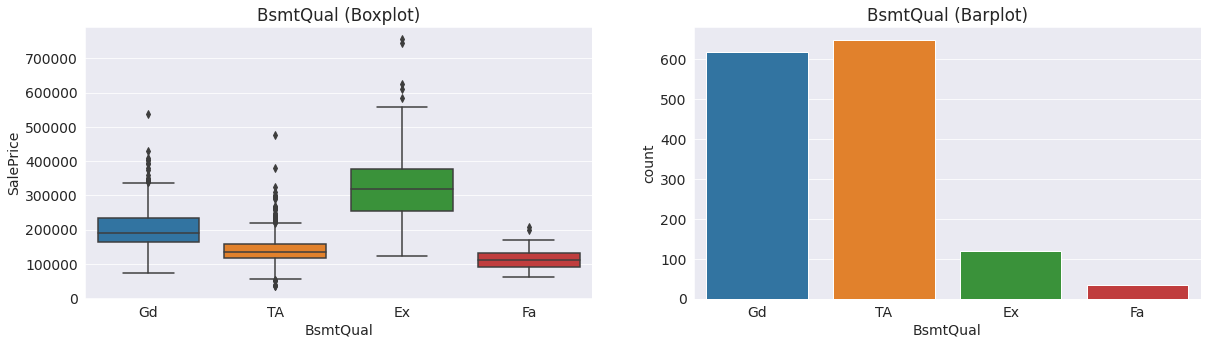

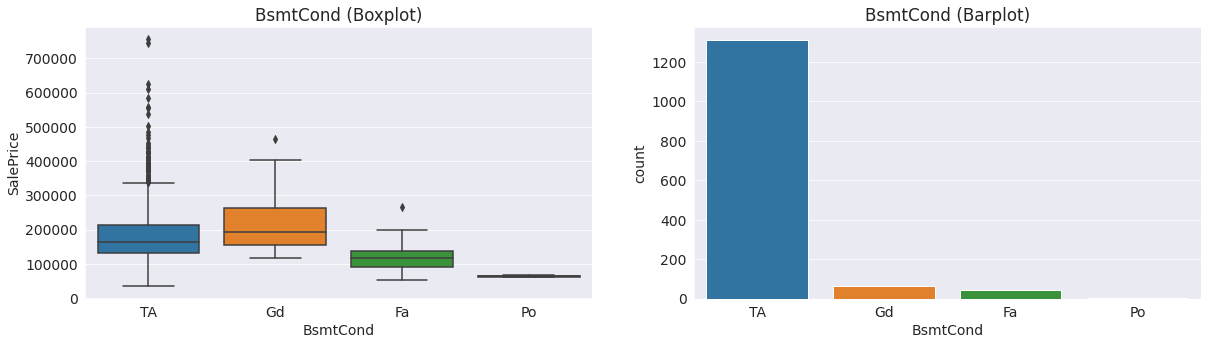

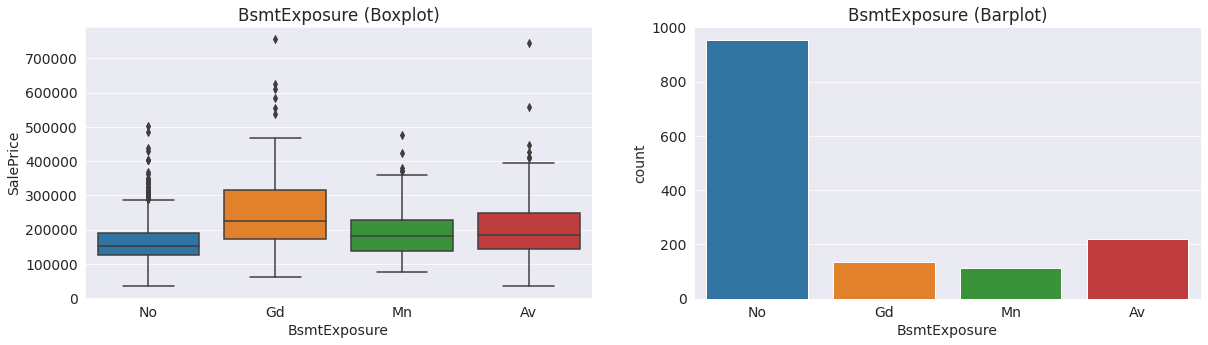

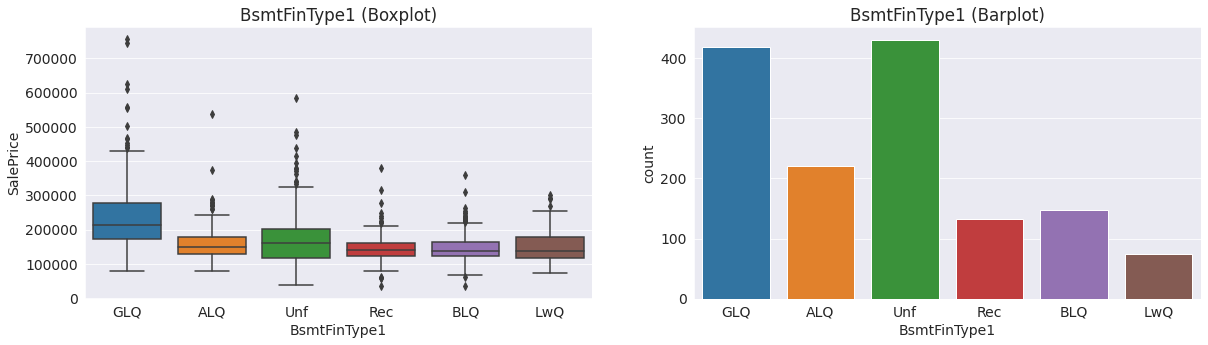

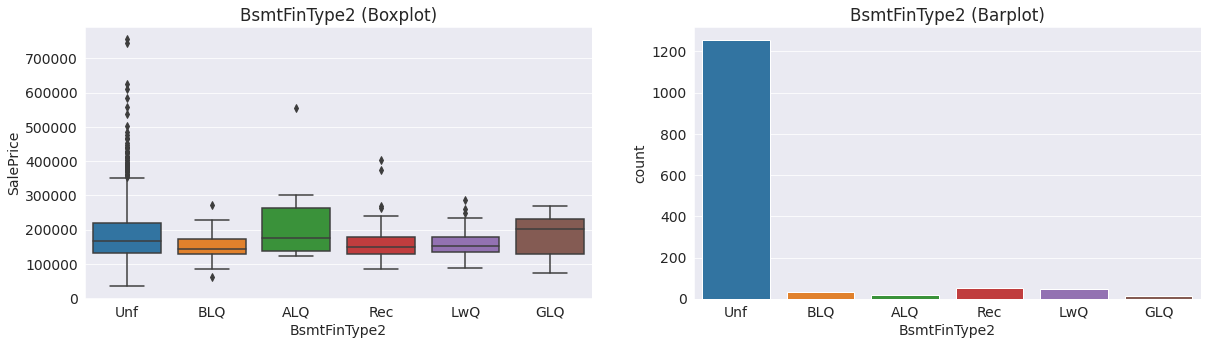

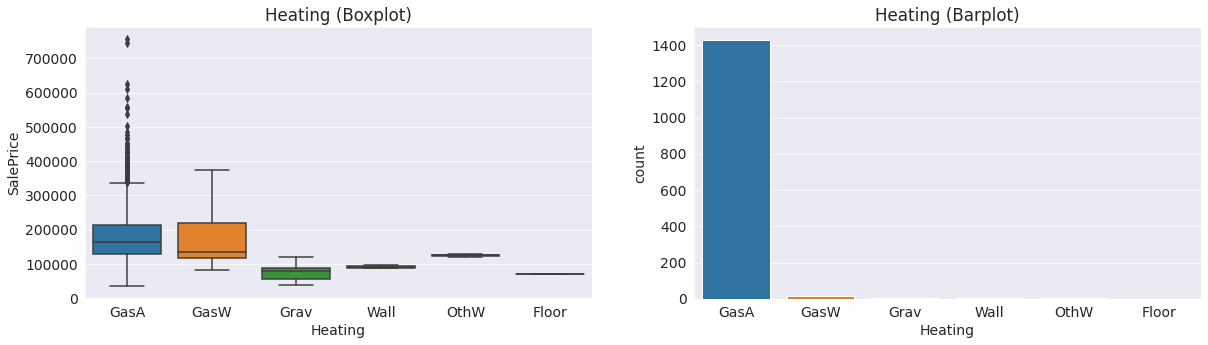

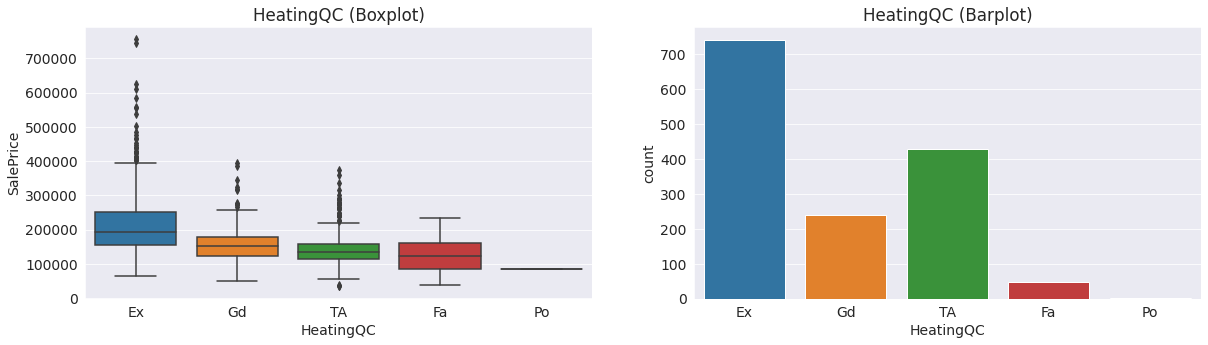

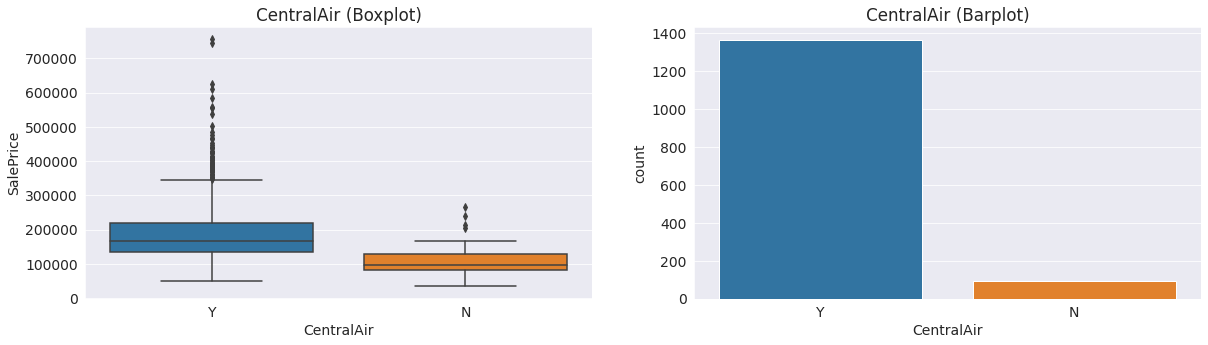

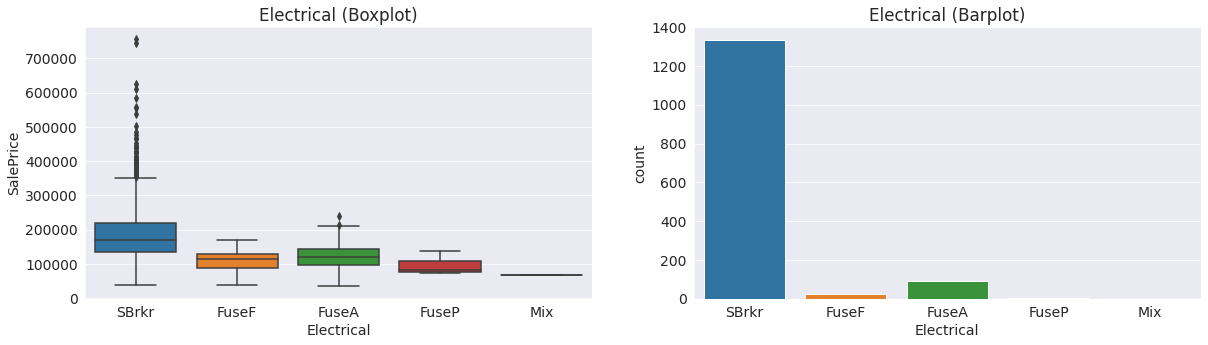

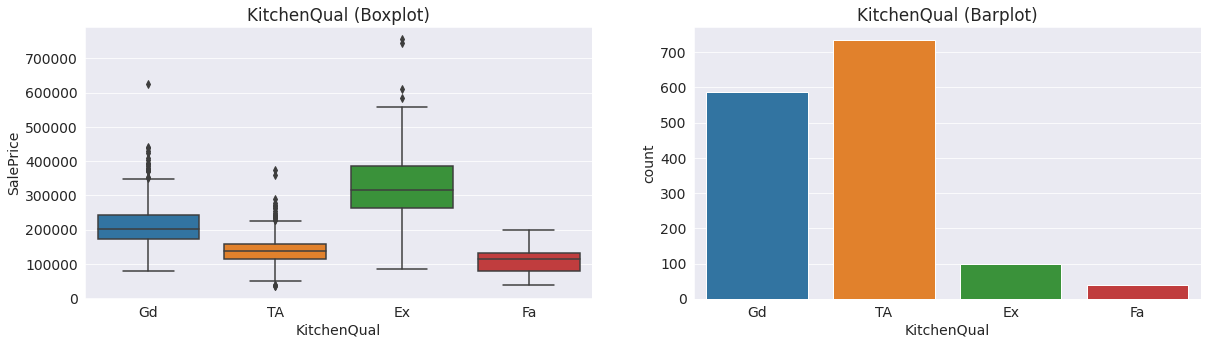

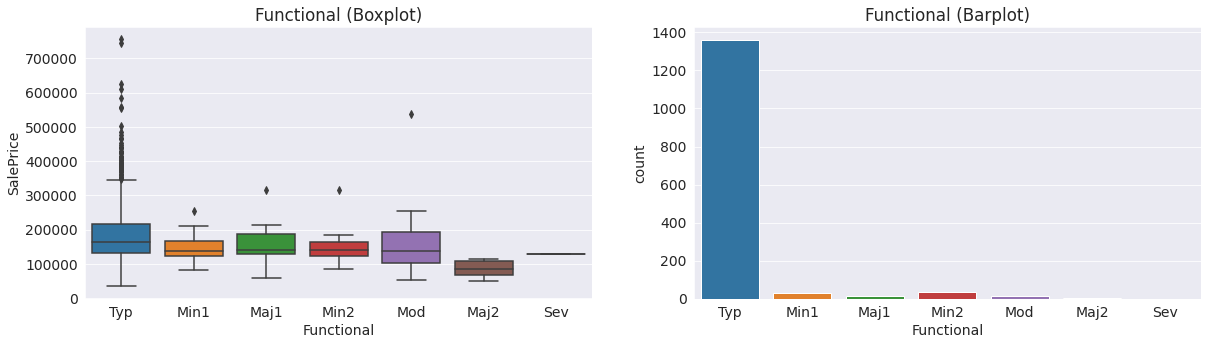

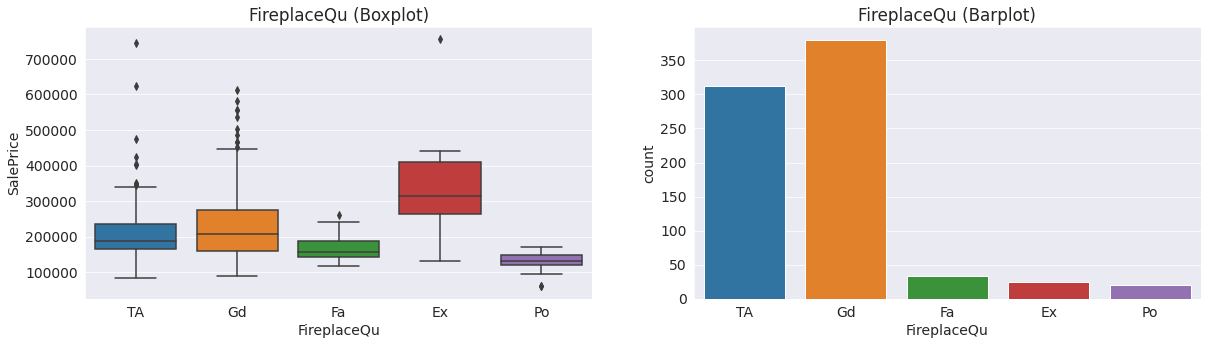

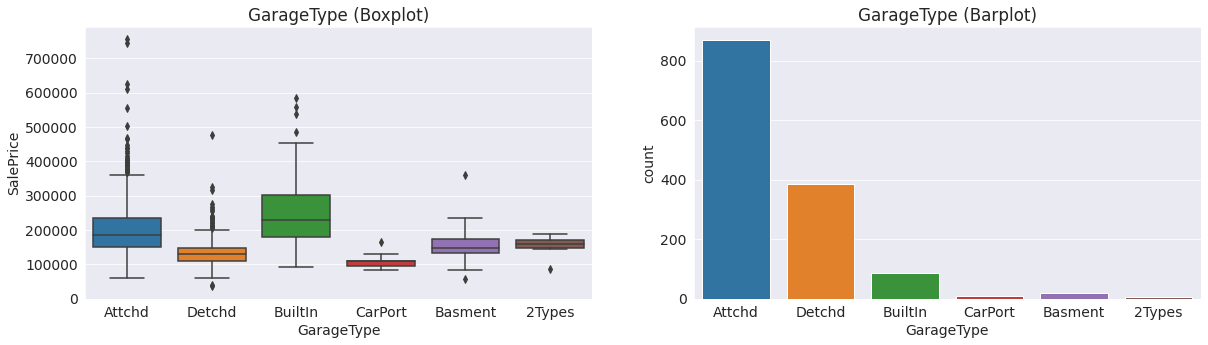

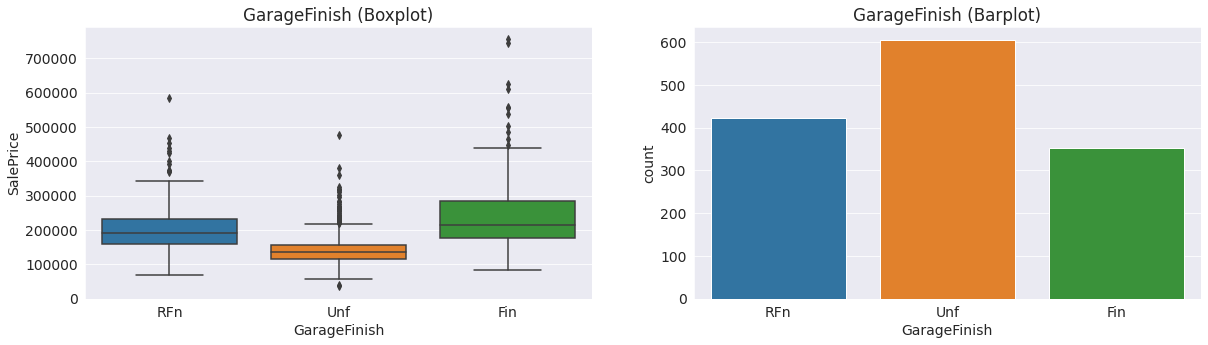

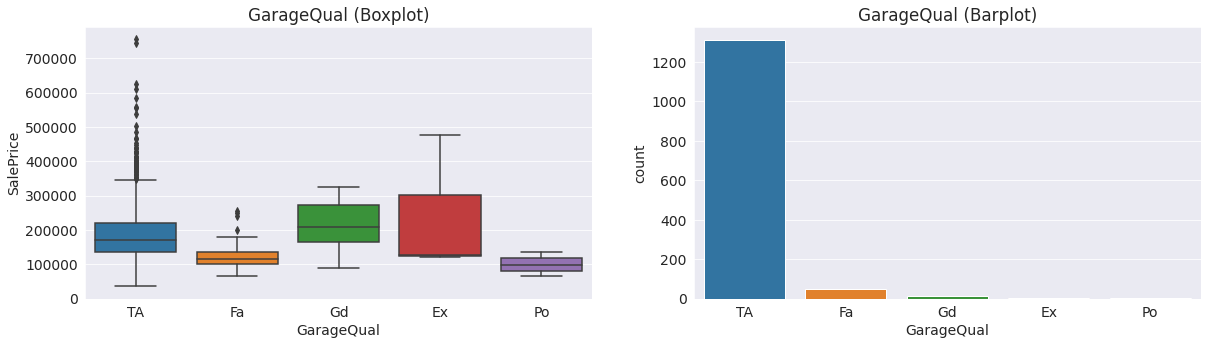

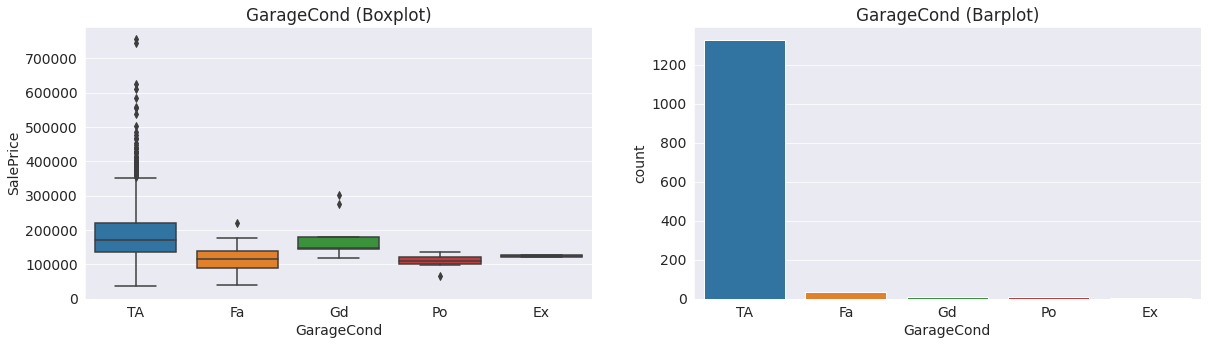

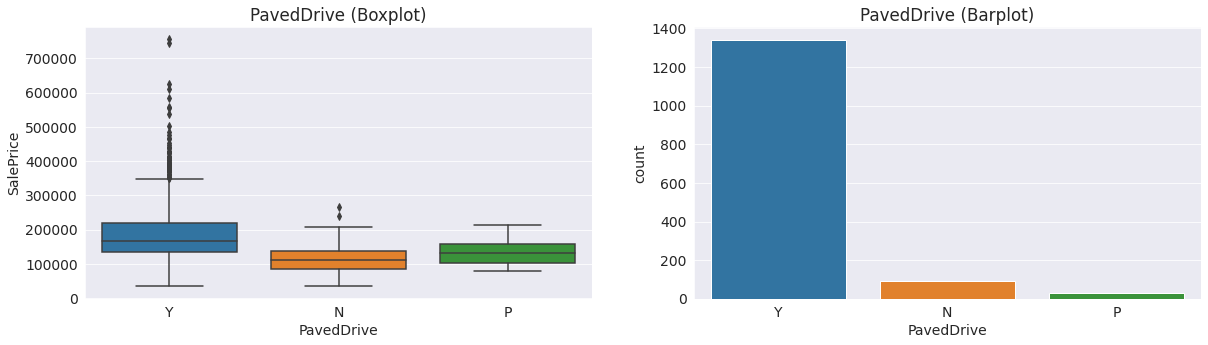

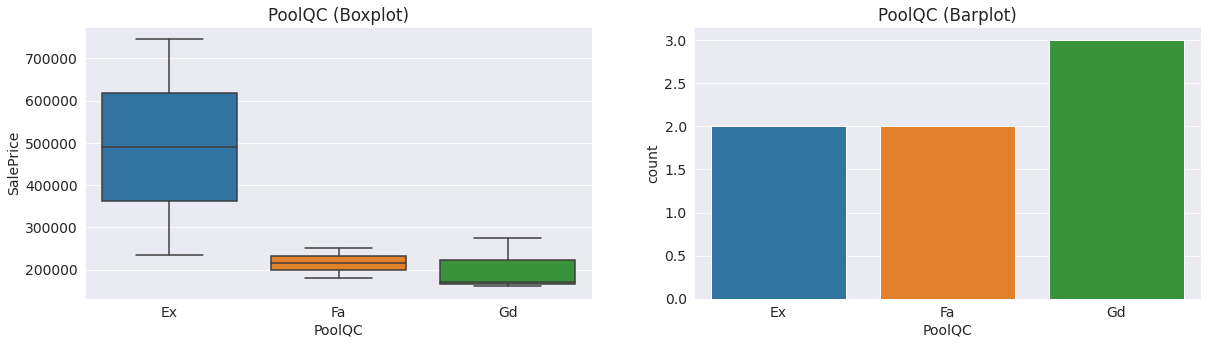

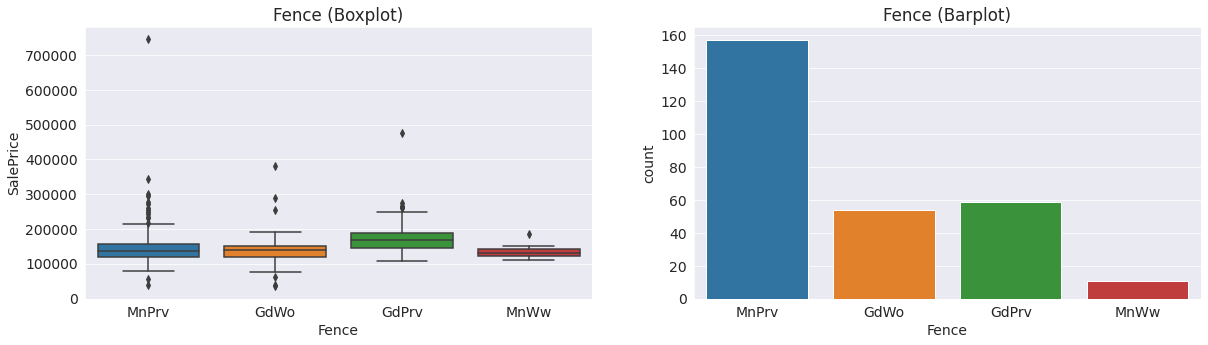

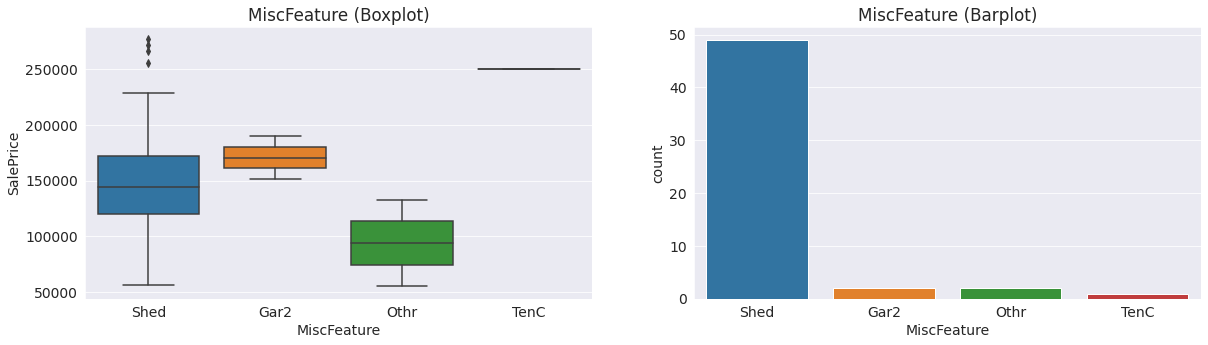

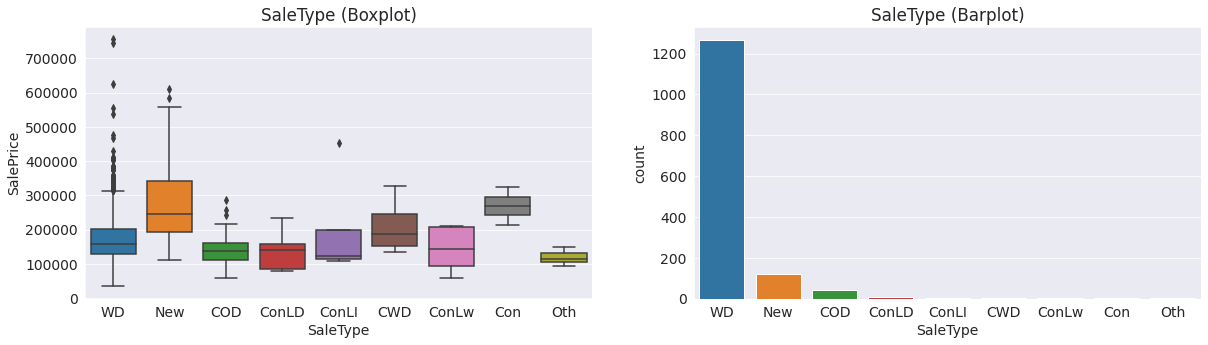

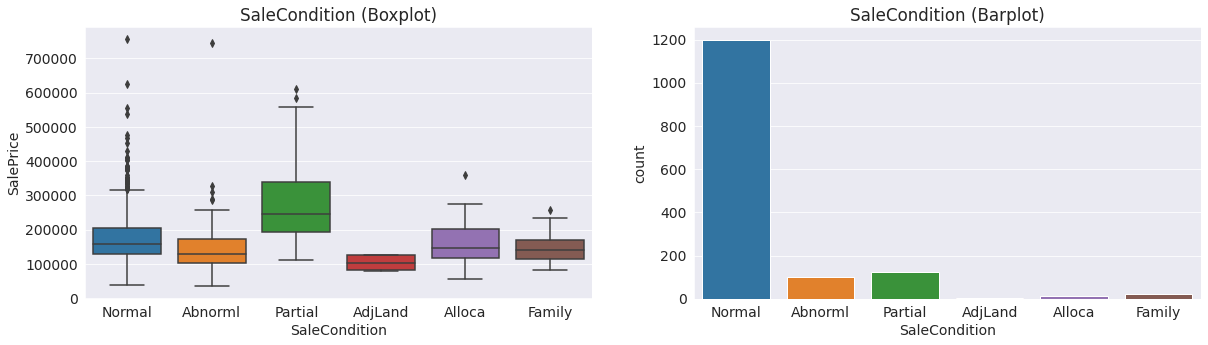

In [15]:
for i in discrete+categorical:
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    axes[0].set_title(i+' (Boxplot)')
    sns.boxplot(y=prices_df['SalePrice'], x=prices_df[i], ax=axes[0])
    axes[1].set_title(i+' (Barplot)')
    sns.countplot(x=prices_df[i], ax=axes[1])

Here the countplot shows number of houses sold corresponding to the value of the attribute and the boxplot shows distribution of `SalePrice` corresponding to the value of the attribute. Observe that the number of houses sold corresponding to a value of the attribute can be less in number and still can cause wide distribution of corresponding `SalePrice`.

##### Now will find the distribution of numeric values while comparing the same attribute with SalePrice using scatterplot

In [16]:
Numeric_Attributes=['LotFrontage','LotArea','YearBuilt',
 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
 'LowQualFinSF', 'GrLivArea',   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

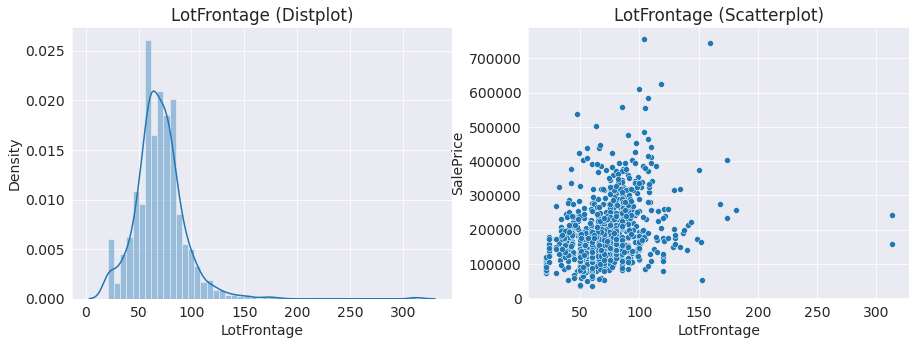

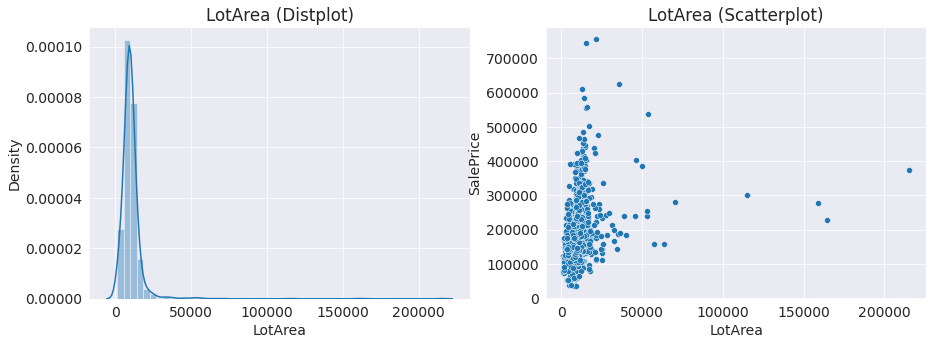

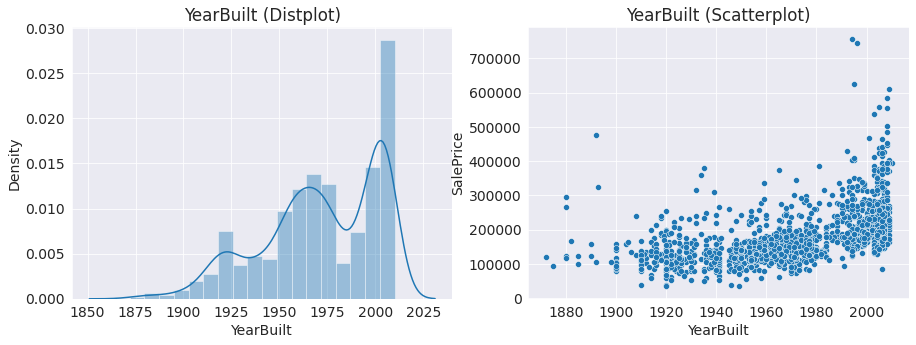

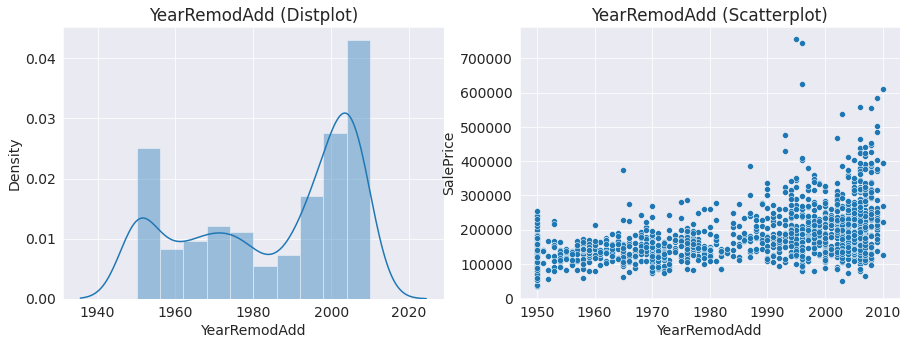

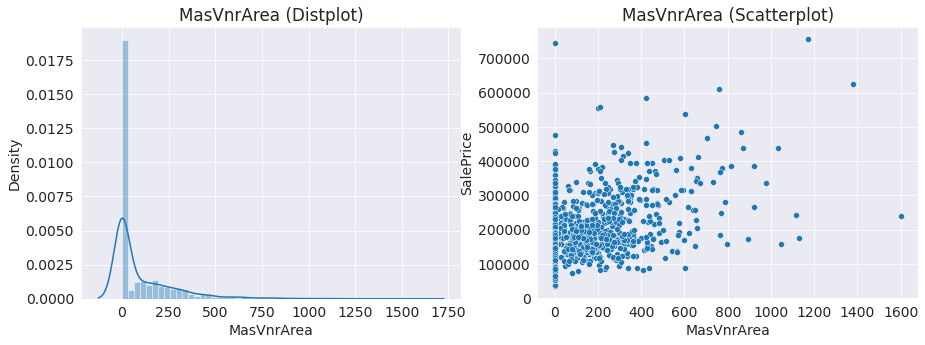

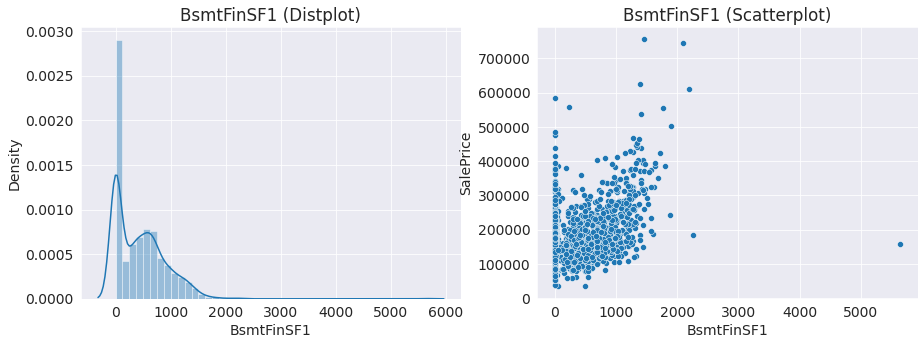

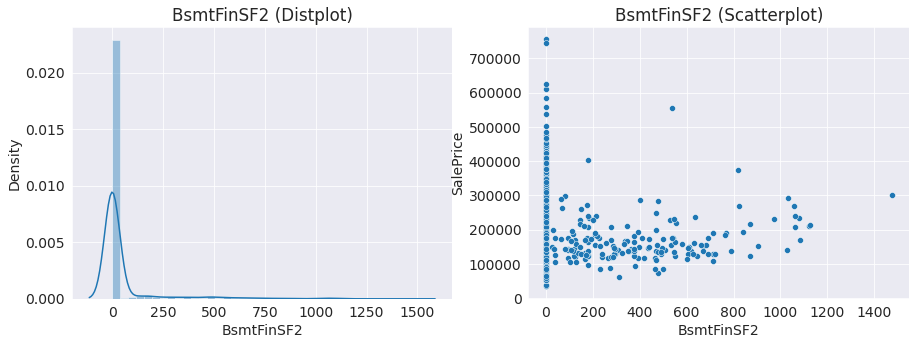

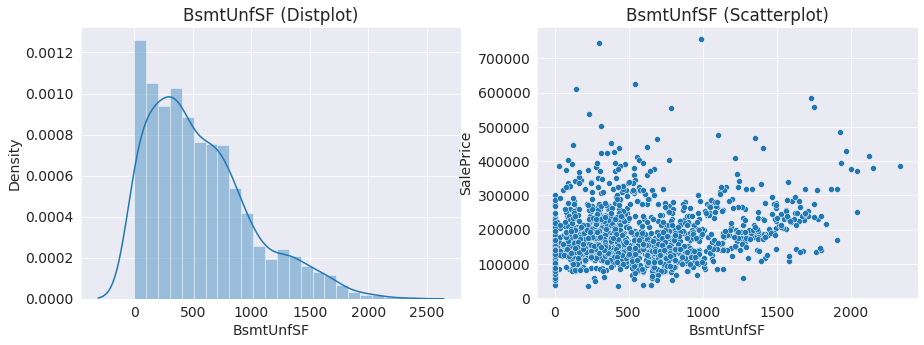

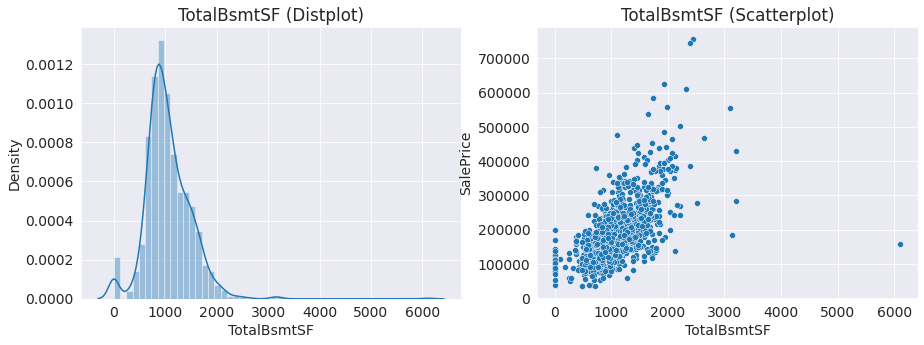

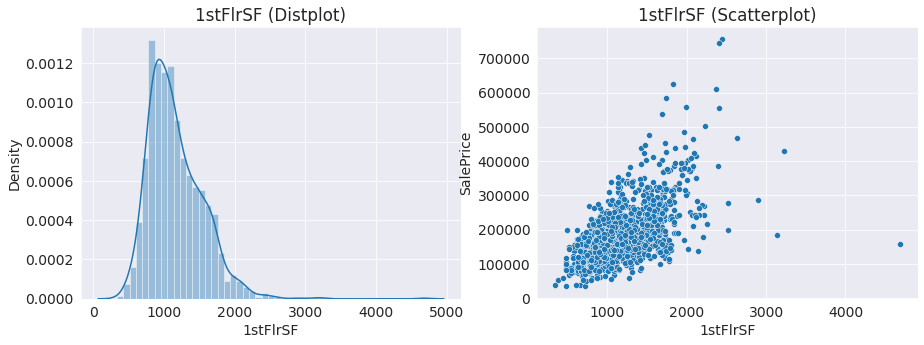

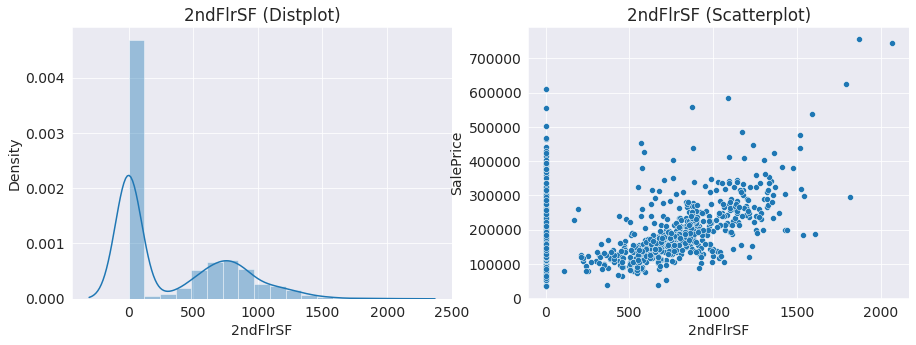

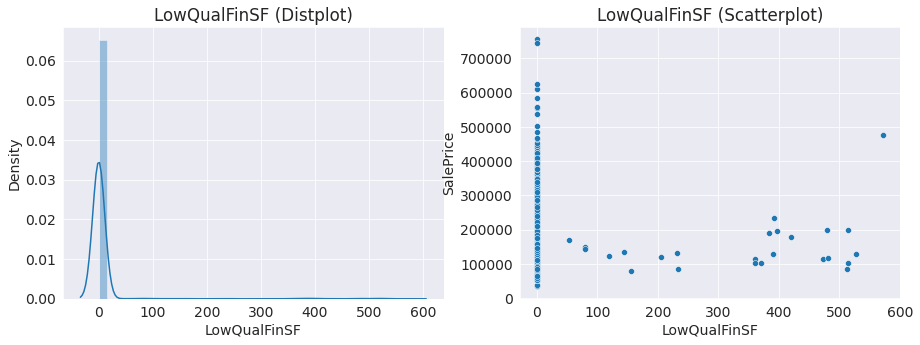

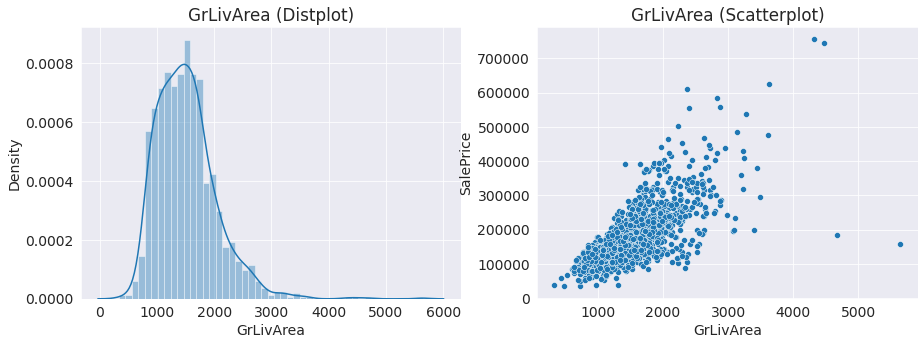

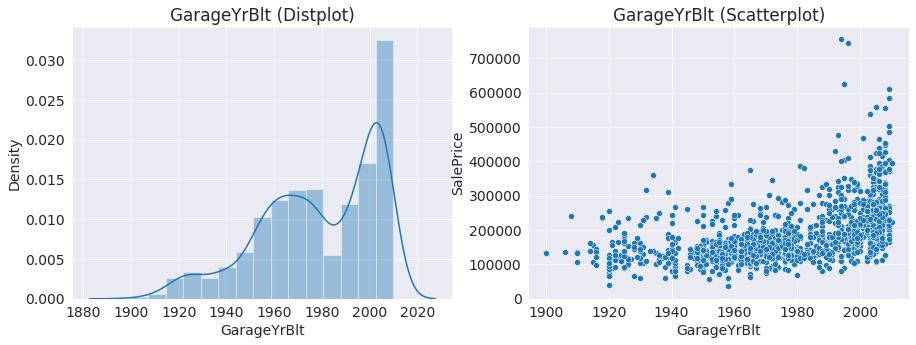

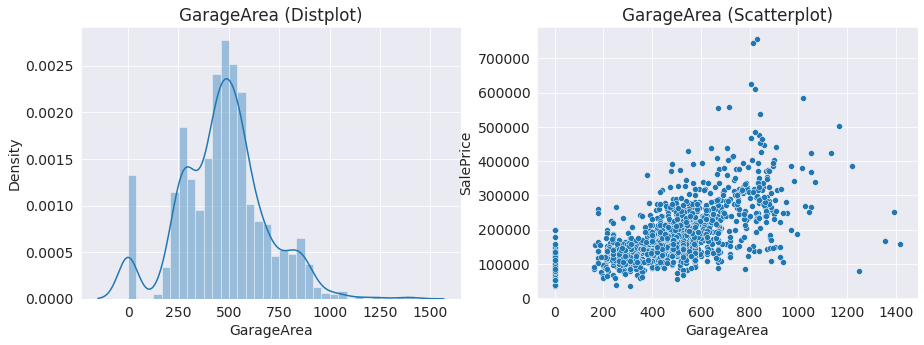

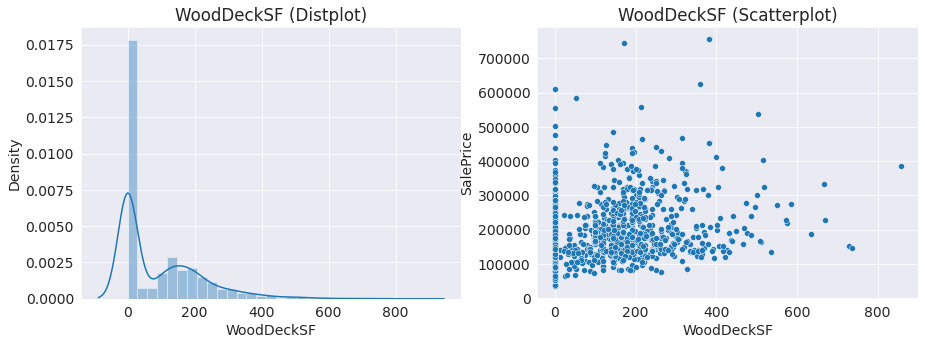

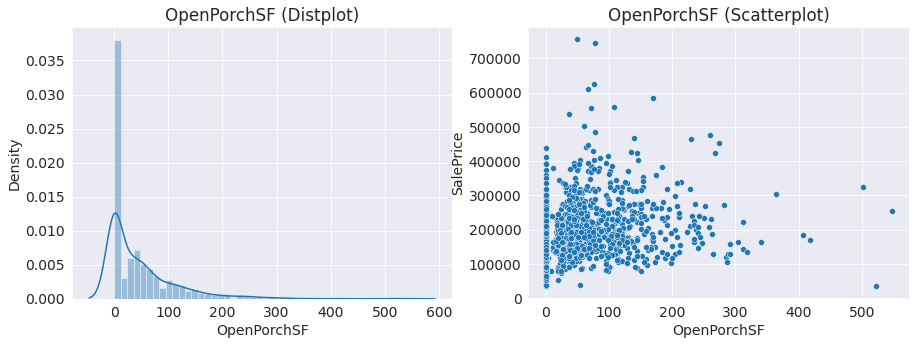

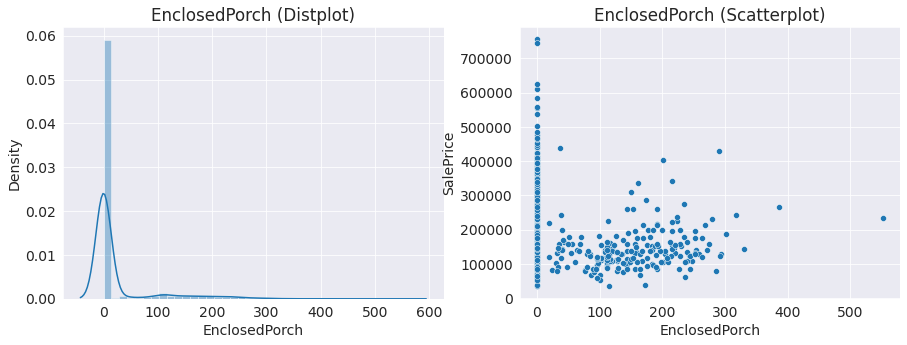

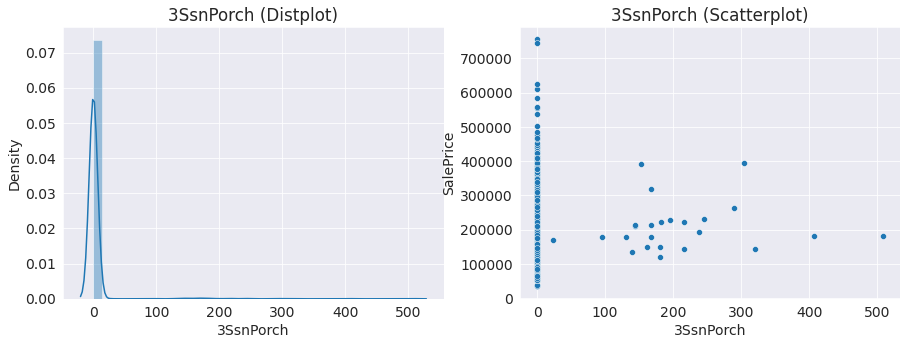

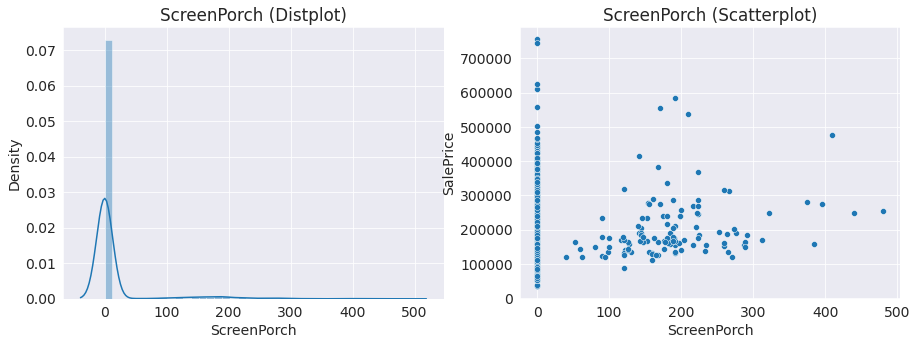

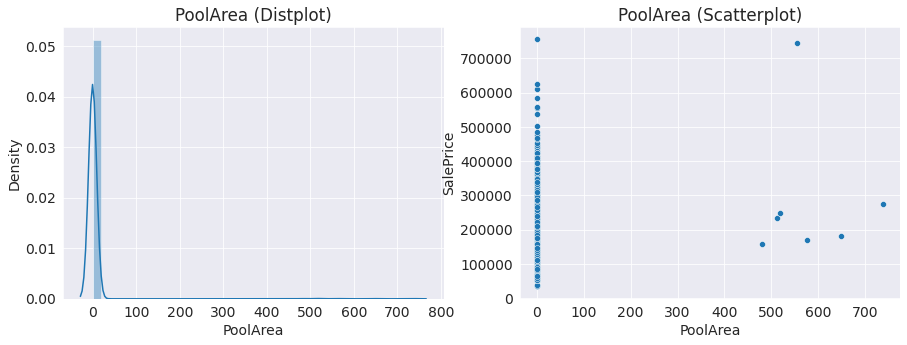

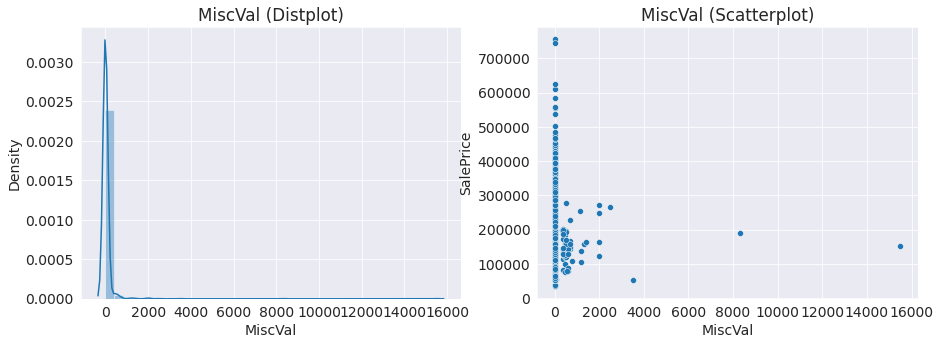

In [17]:
for i in Numeric_Attributes:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title(i+' (Distplot)')
    sns.distplot(prices_df[i], ax=axes[0])
    axes[1].set_title(i+' (Scatterplot)')
    sns.scatterplot(y=prices_df['SalePrice'], x=prices_df[i], ax=axes[1])

From the displot one can conclude that the numeric attributes aren't normally distributed also they have wide range. We need to deal with the outliers that cause this wide distribution of the data.

# 2. Preparing the Dataset for Training

Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the columns that show wide distribution of the ranges (Use previous distribution plots)
2. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
4. Deal with outliers by taking the logs of the widely spread attributes.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data.
6. Split the dataset into training and validation sets.


### Identify the widely distributed columns
Here we will take all the numeric columns we have used for plotting above

In [18]:
import numpy as np
log_numeric_cols=Numeric_Attributes.copy()
prices_df[log_numeric_cols]=np.log(prices_df[log_numeric_cols]+1)

In [19]:
prices_df[log_numeric_cols].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,4.189655,9.042040,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,7.602900,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0
1,4.394449,9.169623,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,7.589336,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0
2,4.234107,9.328212,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,7.601902,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0
3,4.110874,9.164401,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,7.600402,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0
4,4.442651,9.565284,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,7.601402,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0


### Identify Inputs and Targets

While the dataset contains 81 columns, not all of them are useful for modeling. Note the following:

- The first column `Id` is a unique ID for each house and isn't useful for training the model.
- The last column `SalePrice` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

In [20]:
# Identify the input columns (a list of column names)
input_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [21]:
# Identify the name of the target column (a single string, not a list)
target_col = 'SalePrice'

Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [22]:
inputs_df = prices_df[input_cols].copy()

In [23]:
targets = prices_df[target_col]

### Identify Numeric and Categorical Data

The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

In [24]:
#getting the list of numeric columns
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#getting the list of categorical columns
categorical_cols = inputs_df.select_dtypes('object').columns.tolist()

In [25]:
prices_df[numeric_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,4.189655,9.042040,7,5,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1,0,2,1,3,1,8,0,7.602900,2,6.308098,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008
1,20,4.394449,9.169623,6,8,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0,1,2,0,3,1,6,1,7.589336,2,6.133398,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007
2,60,4.234107,9.328212,7,5,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,1,0,2,1,3,1,6,1,7.601902,2,6.411818,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008
3,70,4.110874,9.164401,7,5,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,1,0,1,0,3,1,7,1,7.600402,3,6.466145,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006
4,60,4.442651,9.565284,8,5,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,1,0,2,1,4,1,9,1,7.601402,3,6.729824,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008


### Impute Numerical Data

Some of the numeric columns in our dataset contain missing values (`nan`).

In [26]:
#We will fill the missing values only from the numeric columns
#Categorical columns can be dealth with using encoder
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
# 1. Create the imputer
imputer = SimpleImputer(strategy = 'median')

In [29]:
# 2. Fit the imputer to the numeric colums
imputer.fit(prices_df[numeric_cols])

SimpleImputer(strategy='median')

In [30]:
# 3. Transform and replace the numeric columns
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

After imputation, none of the numeric columns should contain any missing values.

In [31]:
missing_counts = inputs_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0] # should be an empty list

Series([], dtype: int64)

### Scaling Numerical Data
A good practice is to scale numeric features to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [32]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,20.0,3.091042,7.170888,1.0,1.0,7.535297,7.576097,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.00000,0.000000,5.814131,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.550135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,2006.0
max,190.0,5.749393,12.279537,10.0,9.0,7.606387,7.606387,7.378384,8.638525,7.296413,7.756623,8.717846,8.453827,7.63337,6.350886,8.638171,3.0,2.0,3.0,2.0,8.0,3.0,14.0,3.0,7.606387,4.0,7.257708,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.64866,12.0,2010.0


In [33]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(prices_df[numeric_cols])

MinMaxScaler()

In [34]:
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [35]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


All ranges have been scaled to 0 to 1

### Encode Categorical Columns

Our dataset contains several categorical columns, each with a different number of categories.

In [36]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.
One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [37]:
from sklearn.preprocessing import OneHotEncoder

# 1. Create the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 2. Fit the encoder to the categorical colums
encoder.fit(prices_df[categorical_cols])

# 3. Generate column names for each category
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(len(encoded_cols))

# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

268


The new one-hot category columns should now be added to `inputs_df`.

In [38]:
inputs_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,...,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,RL,0.413268,0.366271,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.666667,0.500,0.950951,0.884882,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.716038,Gd,TA,PConc,Gd,TA,No,GLQ,0.759508,Unf,0.0,0.646838,0.774668,GasA,Ex,Y,SBrkr,0.355839,0.884420,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,Gd,0.500000,Typ,0.000000,NaN,Attchd,0.938012,RFn,0.50,0.869159,TA,TA,Y,0.000000,0.654449,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.090909,0.50,WD,Normal,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,RL,0.490307,0.391245,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,0.555556,0.875,0.760143,0.437057,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,0.797188,Unf,0.0,0.728731,0.819153,GasA,Ex,Y,SBrkr,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,TA,0.333333,Typ,0.333333,TA,Attchd,0.696872,RFn,0.50,0.845088,TA,

But we only need imputed and sclaed numeric columns along with encoded categorical columns

In [39]:
inputs_df[numeric_cols + encoded_cols].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,...,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.413268,0.366271,0.666667,0.500,0.950951,0.884882,0.716038,0.759508,0.0,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.938012,0.50,0.869159,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.490307,0.391245,0.555556,0.875,0.760143,0.437057,0.

##### We will also take log of the target column to scale it down

In [40]:
log_targets = np.log(targets)

# 3. K-Fold Cross Validation
We will use K-Fold Cross Validation for choosing the best model for predictions and tune that model only.

In [41]:
#Importing Important Functions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [42]:
#Importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [43]:
#Creating the list of models for cross validation
models=[
    ('Rg',Ridge()),
    ('Ls',Lasso()),
    ('EN',ElasticNet()),
    ('SGD',SGDRegressor()),
    ('DT',DecisionTreeRegressor()),
    ('RF',RandomForestRegressor()),
    ('GB',GradientBoostingRegressor()),
    ('SVR',SVR()),
    ('XGB',XGBRegressor())
]

#Evaluae the created models
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=20)
    cv_results=cross_val_score(model, inputs_df[numeric_cols + encoded_cols], log_targets, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

Rg: 0.885042 (0.076886)
Ls: -0.016767 (0.018420)
EN: -0.016767 (0.018420)
SGD: 0.739771 (0.088702)
DT: 0.742516 (0.072340)
RF: 0.872540 (0.031467)
GB: 0.896918 (0.025845)
SVR: 0.877684 (0.030223)
XGB: 0.874463 (0.034983)


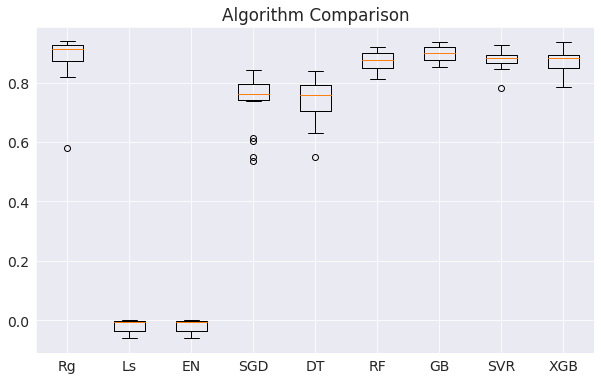

In [44]:
#Compare our models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

From the above plot one can conclude that the `GradientBoostingRegressor()` is the best performing model among them.

# 4. Training, Evaluating and Tuning
Now we will train and tune the best model we have found out here.

#### Training and Validation Set

Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers. 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        log_targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [47]:
# Create the model
model = GradientBoostingRegressor()

In [48]:
# Fit the model using inputs and targets
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

GradientBoostingRegressor()

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
train_preds = model.predict(train_inputs)
train_preds

array([12.15202217, 12.06946122, 11.59923262, ..., 11.72415111,
       12.11446543, 12.16896908])

In [51]:
train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 0.07645363900959831.


In [52]:
val_preds = model.predict(val_inputs)

In [53]:
val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))

In [54]:
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 0.1310359545753939.


Observe that the RMSE for validation data is twice that of trainig data. Here the model hasn't been generlized well therefore it performs well on seen data and doesn't do quite well on unseen data, this phenomena is called as overfitting. To overcome this we will use hyperparameter tuning.

#### Hyperparamter Tuning

In [55]:
model=GradientBoostingRegressor(random_state=42)
parameters = {
    'learning_rate':[0.01, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 1, 10, 100],
    'n_estimators':[10, 50, 100, 200, 300, 400, 500],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,10, 50, 100, 200, 300]
}

In [56]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,parameters, cv=5)
cv.fit(inputs_df[numeric_cols + encoded_cols],log_targets.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5,
                                           1, 10, 100],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 10, 50, 100, 200, 300],
                         'n_estimators': [10, 50, 100, 200, 300, 400, 500]})

In [57]:
cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 200,
 'n_estimators': 300}

In [58]:
#training with best parameters
model =  GradientBoostingRegressor(random_state=42,
                                   learning_rate=cv.best_params_['learning_rate'],
                                   max_depth=cv.best_params_['max_depth'],
                                   n_estimators=cv.best_params_['n_estimators'],
                                   max_features=cv.best_params_['max_features'])
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)
model.score(train_inputs[numeric_cols + encoded_cols], train_targets), model.score(val_inputs, val_targets)

(0.9850758857012344, 0.9047987718063448)

#### Feature Importance

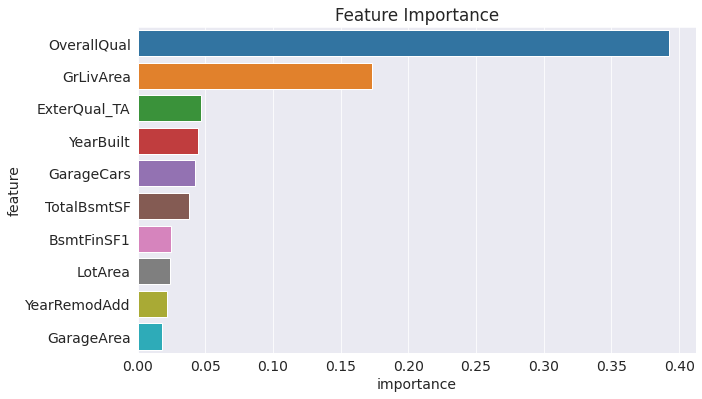

In [59]:
model.feature_importances_
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Making Predictions on Test Data

The model can be used to make predictions on new inputs using the following helper function:

In [60]:
#this function does all the needful and makes the predictions on the inputs
def predict_input(input_df):
    input_df[log_numeric_cols]=np.log(input_df[log_numeric_cols]+1)
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return np.exp(model.predict(X_input))

In [61]:
#loading the test data
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [62]:
#loading the sample data
sample=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [63]:
#making predictions on the test data and saving it for the submission
sample['SalePrice']=predict_input(test)
sample.head()

,Id,SalePrice
0,1461,126029.253386
1,1462,158708.682149
2,1463,182708.277577
3,1464,189172.096420
4,1465,190825.974345


In [64]:
sample.to_csv('submission.csv',index=False)

### Saving the model

Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [65]:
import joblib

In [66]:
house_price_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'log_numeric_cols':log_numeric_cols
}

In [67]:
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']

The End